![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 19/12/2023
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Se le recomienda levantar un ambiente de `conda` para instalar las librerías y así evitar cualquier problema con las versiones.


In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import optuna
from sklearn.model_selection import cross_val_score

c:\Users\kathe\Desktop\2023-2\LabMDS\Proyecto2\Proyecto_2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
# Exploracion de datos (No dentro de lo pedido)
Esto lo realizamos aparte, para entender de mejor forma como se comportaban los datos

In [2]:
# Cargamos los datos
df = pd.read_parquet("dataset.pq")
df.head(10)

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
5,CUS_0x95ee,31.0,Lawyer,73928.46,5988.705000,4,5,8,0.0,8,...,NaN,548.20,31.580990,32.0,No,0.000000,42.635590,!@9#%8,796.234910,0
6,CUS_0x284a,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,0,...,4.0,352.16,29.187913,31.0,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,0
7,CUS_0x5407,30.0,Media_Manager,34081.38,2611.115000,8,7,15,3.0,30,...,9.0,1704.18,33.823488,15.0,Yes,70.478333,29.326364,High_spent_Medium_value_payments,411.306804,1
8,CUS_0x4157,24.0,Doctor,114838.41,9843.867500,2,5,7,3.0,11,...,8.0,1377.74,27.813354,21.0,No,226.892792,254.571767,High_spent_Large_value_payments,742.922191,0
9,CUS_0xba08,45.0,Journalist,31370.80,NaN,1,6,12,2.0,-2,...,5.0,421.43,37.565053,27.0,No,46.616129,252.644827,Low_spent_Small_value_payments,273.262377,0


In [3]:
df2 = df.copy()

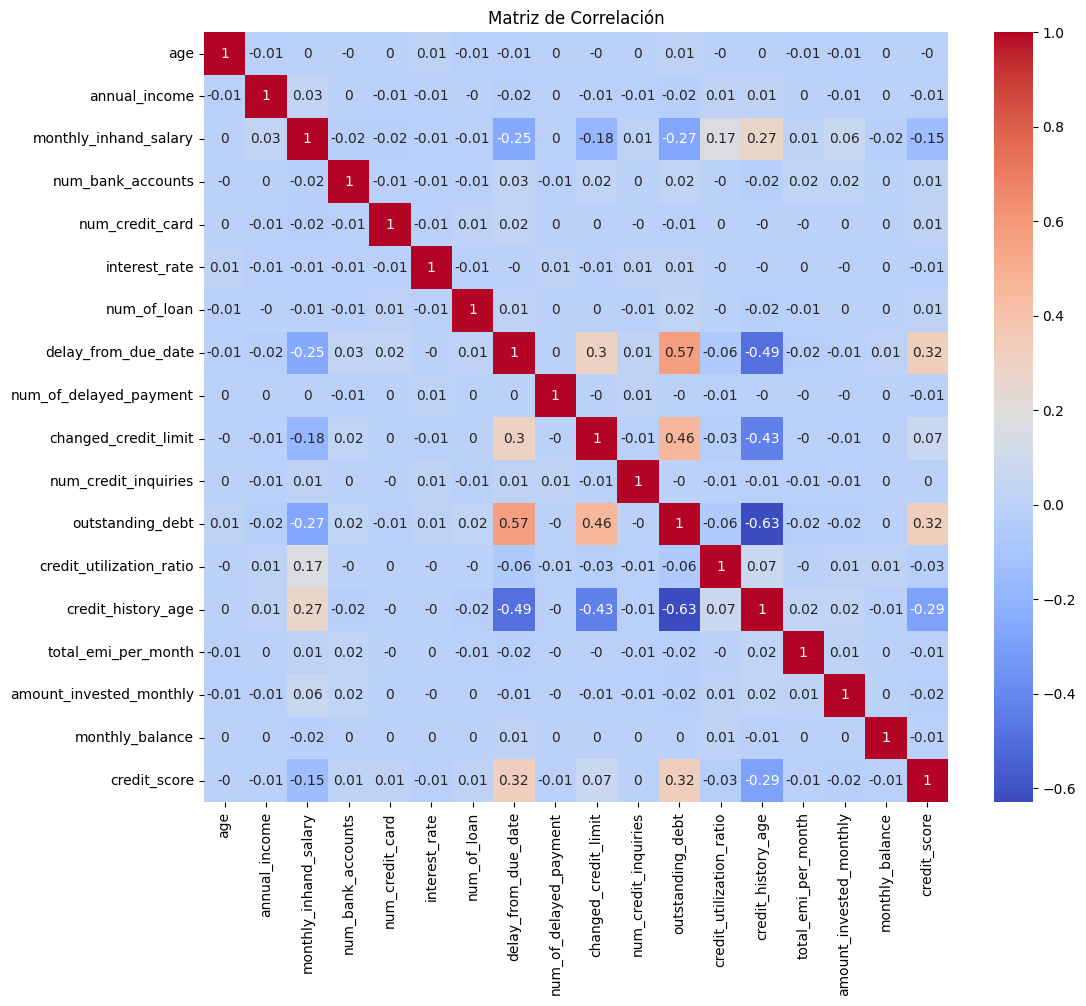

In [4]:

# Selecciona solo las columnas numéricas para la matriz de correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlation_matrix = df_numeric.corr().round(2)

# Para visualizar la matriz de correlación, puedes usar seaborn
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

De acuerdo a lo observado en profile.html hay variables que tienen outliers, exploremos estas observaciones.

In [5]:
df[df["age"]<0]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
156,CUS_0x31d5,-500.0,Doctor,15488.885,1273.740417,0,4,4,0.0,10,...,9.0,1287.59,39.432106,25.0,No,0.000000,155.918667,Low_spent_Small_value_payments,261.455374,0
273,CUS_0x8b12,-500.0,Journalist,63101.140,NaN,3,4,3,4.0,1,...,5.0,64.53,28.475303,17.0,No,170.542965,260.406959,High_spent_Small_value_payments,353.692909,0
276,CUS_0x7cfc,-500.0,Writer,108415.000,8848.583333,3,5,16,1.0,14,...,6.0,1075.84,32.822704,NaN,Yes,76.857563,413.806421,High_spent_Small_value_payments,654.194349,0
299,CUS_0xd83,-500.0,Lawyer,19310.620,1463.093138,9,6,34,5.0,47,...,10.0,1306.08,25.611673,10.0,Yes,238.490291,10000.000000,High_spent_Medium_value_payments,283.989766,0
391,CUS_0xc081,-500.0,Writer,85423.160,7000.596667,6,3,14,2.0,30,...,11.0,902.37,34.339977,NaN,Yes,120.141634,95.940454,!@9#%8,733.977579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11600,CUS_0x5502,-500.0,Architect,167067.080,13909.256667,2,3,2,1.0,11,...,4.0,753.58,27.368918,27.0,No,115.510830,NaN,Low_spent_Large_value_payments,510.358898,0
11748,CUS_0x7992,-500.0,Engineer,16604.270,1162.689167,5,5,14,3.0,9,...,8.0,888.66,23.945856,14.0,Yes,27.589593,13.376225,High_spent_Large_value_payments,315.303098,0
11851,CUS_0x8110,-500.0,_______,92942.400,7474.200000,5,4,7,6.0,18,...,6.0,147.78,24.624913,17.0,Yes,346.103617,949.932054,!@9#%8,NaN,0
12188,CUS_0x40c8,-500.0,Media_Manager,91702.140,7455.845000,5,7,10,3.0,13,...,2.0,233.12,36.612605,20.0,No,64978.000000,193.079473,High_spent_Large_value_payments,651.777903,0


In [6]:
df[df["age"]>150]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
50,CUS_0xb14,3052.0,Manager,49967.01,4091.917500,6,5,31,6.0,27,...,12.0,2253.95,31.520782,17.0,Yes,156.003312,116.361294,High_spent_Medium_value_payments,386.827144,1
67,CUS_0xa156,4431.0,Entrepreneur,58674.66,NaN,8,5,15,4.0,55,...,11.0,2425.38,33.808584,13.0,NM,116.103417,334.269165,Low_spent_Small_value_payments,322.082919,1
147,CUS_0x710f,3115.0,Scientist,33502.10,2890.841667,7,9,27,6.0,57,...,12.0,2362.68,22.183579,18.0,Yes,158.607927,184.548187,Low_spent_Large_value_payments,215.928052,1
343,CUS_0x8c03,4670.0,Scientist,54987.52,NaN,4,5,10,0.0,18,...,8.0,1263.12,29.000913,16.0,Yes,0.000000,420.219964,Low_spent_Large_value_payments,326.009369,0
373,CUS_0xa560,395.0,_______,133410.66,11387.555000,1,3,4,0.0,5,...,3.0,933.84,27.005230,27.0,No,0.000000,518.235781,High_spent_Small_value_payments,880.519719,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12083,CUS_0x6ff5,7445.0,Entrepreneur,43856.38,3870.698333,2,5,6,0.0,4,...,1.0,975.82,29.259389,16.0,No,42213.000000,81.237487,High_spent_Small_value_payments,565.832346,0
12277,CUS_0x42c3,598.0,Entrepreneur,40056.10,NaN,6,4,13,3.0,29,...,2.0,182.58,29.849686,NaN,No,76.833249,82.693506,High_spent_Medium_value_payments,429.574078,0
12398,CUS_0x6334,1683.0,Mechanic,13944362.00,8216.153333,5,6,15,5.0,25,...,4.0,698.23,24.567582,14.0,Yes,302.916240,168.311204,High_spent_Large_value_payments,NaN,0
12436,CUS_0x290c,1070.0,Engineer,28954.04,2703.836667,8,5,25,5.0,36,...,10.0,2077.68,37.483994,16.0,Yes,96.250067,NaN,!@9#%8,NaN,1


Notamos que hay valores en la variable edad, que por la naturaleza de esta, no tienen sentido. Se elimanaran estas observaciones ya que no tienen sentido

In [7]:
#Eliminamos anomalias en age
df2 = df2[(df2["age"] >0) & (df2["age"] < 150)]
df2

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0x372c,19.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,9,...,1.0,1079.48,35.716618,28.0,No,34.975457,115.184984,High_spent_Medium_value_payments,NaN,0
12496,CUS_0xf16,45.0,Media_Manager,16680.35,NaN,1,1,5,4.0,1,...,8.0,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,0
12497,CUS_0xaf61,50.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,...,3.0,620.64,39.300980,30.0,No,84.205949,42.935566,High_spent_Medium_value_payments,NaN,0
12498,CUS_0x8600,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,...,9.0,3571.70,37.140784,6.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,NaN,0


<Axes: xlabel='age', ylabel='Count'>

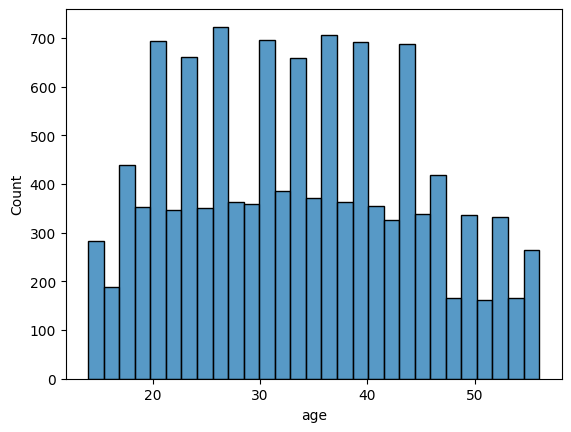

In [8]:
sns.histplot(x=df2["age"])

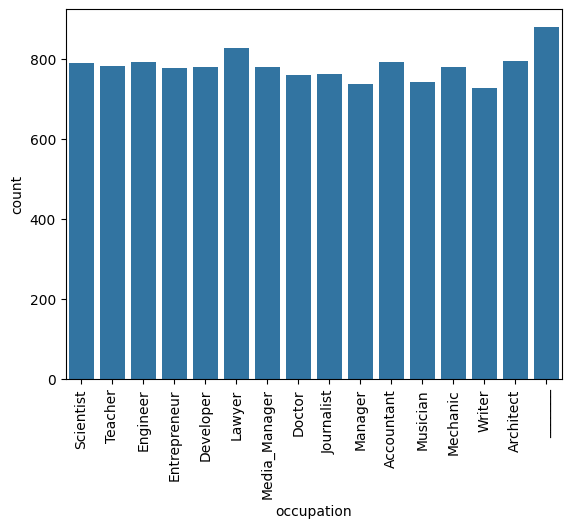

In [9]:

# Asegúrate de que df["occupation"] es la columna que deseas graficar
sns.countplot(x=df["occupation"])

plt.xticks(rotation=90)  # Rota las etiquetas del eje x si son muy largas
plt.show()


In [10]:
df['annual_income'] = df['annual_income'].round(2)

df2['annual_income'] = df2['annual_income'].round(2)

df[df["annual_income"] > 3000000]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
28,CUS_0xbffe,40.0,Architect,6515990.0,2210.032500,6,3,15,3.0,25,...,2.0,400.07,23.177617,30.0,Yes,69.602920,51.830859,High_spent_Large_value_payments,339.569471,0
111,CUS_0x8c69,25.0,Musician,9351702.0,1851.335000,4,3,6,3.0,9,...,0.0,399.92,36.096633,20.0,No,25.580281,101.353832,High_spent_Small_value_payments,318.199387,0
287,CUS_0x532d,42.0,Writer,22409880.0,NaN,5,3,4,4.0,0,...,2.0,1483.59,34.959021,32.0,No,98.469454,287.646432,Low_spent_Small_value_payments,138.119781,0
351,CUS_0x345b,41.0,Musician,11993705.0,1157.902500,4,7,14,4.0,19,...,10.0,471.81,28.890305,14.0,Yes,52.024924,85.479986,Low_spent_Small_value_payments,268.285340,0
376,CUS_0x41e4,46.0,Teacher,3961526.0,919.130000,5,879,5,0.0,15,...,6.0,328.41,38.833323,19.0,No,66045.000000,12.680046,High_spent_Large_value_payments,319.232954,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,CUS_0x6a81,31.0,Journalist,5505619.0,NaN,5,3,6,0.0,13,...,6.0,1348.10,30.638268,31.0,No,0.000000,186.334418,Low_spent_Small_value_payments,266.225374,0
12204,CUS_0x3ed3,35.0,Mechanic,7749555.0,5774.633333,5,7,9,1.0,13,...,0.0,1004.53,26.990325,22.0,Yes,51.878854,81.267855,!@9#%8,684.316624,0
12299,CUS_0x63db,39.0,Accountant,5556554.0,1342.634583,0,5,9,4.0,7,...,6.0,683.67,28.891172,29.0,No,42.846609,120.951244,Low_spent_Small_value_payments,NaN,0
12316,CUS_0x1ab8,23.0,Doctor,5539643.0,7181.340000,6,4,10,1.0,28,...,4.0,729.69,30.839674,29.0,Yes,49.311127,NaN,Low_spent_Medium_value_payments,NaN,0


<Axes: xlabel='annual_income', ylabel='Count'>

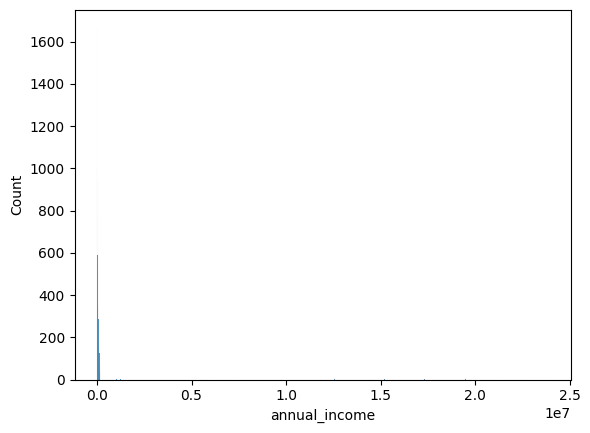

In [11]:
sns.histplot(x=df["annual_income"])

Notamos que la variable annual_income tiene comportamientos extraños (presencia de outliers) que distan mucho a lo que sucede con la variable monthly_inhand_salary, con la cual se esperaria que esten relacionadas

In [12]:
#Ingreso anual promedio por ocupacion
average_income_by_occupation = df.groupby('occupation')['annual_income'].mean()
average_income_by_occupation


occupation
Accountant       163247.297573
Architect        160398.591874
Developer        203992.685038
Doctor           166106.061184
Engineer         142876.474023
Entrepreneur     139277.454343
Journalist       222891.548003
Lawyer           169695.821498
Manager          128009.422935
Mechanic         224147.638321
Media_Manager    148576.020333
Musician         196881.526748
Scientist        158134.155501
Teacher           95250.378926
Writer           174415.096305
_______          101921.728455
Name: annual_income, dtype: float64

In [13]:
df[df["occupation"]=="Teacher"]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
10,CUS_0xa66b,41.0,Teacher,33751.27,2948.605833,5,5,20,3.0,16,...,8.0,1328.93,31.139484,NaN,Yes,65.008174,25.969612,High_spent_Large_value_payments,443.882797,0
17,CUS_0xfdb,46.0,Teacher,32284.62,2898.385000,6,7,17,6.0,13,...,10.0,1283.37,27.930124,7.0,Yes,103.037560,359.771832,Low_spent_Small_value_payments,117.029107,0
47,CUS_0x75c6,30.0,Teacher,87215.68,7489.973333,2,6,8,2.0,2,...,0.0,680.77,35.622883,21.0,NM,19734.000000,304.202810,High_spent_Medium_value_payments,573.112506,0
75,CUS_0x36ab,16.0,Teacher,43241.49,3282.269196,10,7,30,6.0,36,...,10.0,2174.16,30.597624,12.0,Yes,460.427267,94.600395,High_spent_Medium_value_payments,351.206392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12358,CUS_0x5fcb,43.0,Teacher,32690.86,NaN,4,5,6,3.0,17,...,2.0,1380.29,32.788290,NaN,No,50.281845,32.477814,High_spent_Large_value_payments,NaN,0
12360,CUS_0xbd2e,44.0,Teacher,7161.64,758.803333,8,8,29,3.0,22,...,6.0,2669.02,32.552412,11.0,Yes,12.427226,36.475602,Low_spent_Small_value_payments,NaN,1
12427,CUS_0xdfd,40.0,Teacher,16321.82,1566.151667,8,10,23,7.0,57,...,12.0,2686.37,36.869548,15.0,Yes,89.423165,115.765333,!@9#%8,NaN,1
12462,CUS_0x1ea8,30.0,Teacher,33896.53,NaN,7,3,18,2.0,26,...,NaN,807.65,26.800550,27.0,Yes,40.293529,88.098247,!@9#%8,NaN,0


In [14]:
df[df["occupation"]=="Lawyer"]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
5,CUS_0x95ee,31.0,Lawyer,73928.46,5988.705000,4,5,8,0.0,8,...,NaN,548.20,31.580990,32.0,No,0.000000,42.635590,!@9#%8,796.234910,0
6,CUS_0x284a,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,0,...,4.0,352.16,29.187913,31.0,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,0
23,CUS_0x5b48,32.0,Lawyer,12600.44,782.037083,5,5,10,3.0,25,...,11.0,569.80,31.978874,12.0,Yes,26.060348,66.373580,Low_spent_Small_value_payments,275.769781,1
43,CUS_0xc65,22.0,Lawyer,148699.32,12432.610000,3,4,5,3.0,16,...,1.0,949.38,40.605388,31.0,No,364.915177,328.907839,High_spent_Medium_value_payments,799.437983,0
48,CUS_0x9b3c,43.0,Lawyer,81842.28,NaN,10,9,25,9.0,20,...,11.0,3053.16,30.561750,NaN,NM,574.065798,79.380812,High_spent_Large_value_payments,267.572390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12446,CUS_0x1b3b,49.0,Lawyer,76624.48,6123.373333,0,2,8,0.0,13,...,8.0,781.42,33.012713,18.0,No,0.000000,193.696889,High_spent_Medium_value_payments,NaN,0
12455,CUS_0x1d9e,42.0,Lawyer,75994.22,6301.851667,1,4,7,1.0,11,...,3.0,111.75,26.021523,27.0,No,51.702825,140.122955,High_spent_Large_value_payments,NaN,0
12458,CUS_0xb09,31.0,Lawyer,146310.68,12124.556667,5,4,9,1.0,3,...,6.0,928.28,31.695064,22.0,NM,72.250125,283.313995,High_spent_Large_value_payments,NaN,0
12459,CUS_0xbd8f,32.0,Lawyer,107911.60,9168.633333,3,3,17,2.0,21,...,5.0,1086.96,40.843956,18.0,No,110.625989,285.033570,Low_spent_Medium_value_payments,NaN,1


De ahora en adelante tendrá como referencia los promedios de acuerdo a la ocupación del cliente

In [15]:
# Calcular el promedio por ocupación
average_income_by_occupation = df2.groupby('occupation')['annual_income'].mean()

# Función para reemplazar anómalos con el promedio
def replace_anomalies(row):
    occupation = row['occupation']
    income = row['annual_income']
    avg_income = average_income_by_occupation[occupation]

    # Calcula los límites para detectar anómalos()
    Q1 = df2[df2['occupation'] == occupation]['annual_income'].quantile(0.25)
    Q3 = df2[df2['occupation'] == occupation]['annual_income'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Reemplaza el ingreso con el promedio si es un anómalo
    if income < lower_bound or income > upper_bound:
        return avg_income
    else:
        return income

# Aplica la función a cada fila
df2.loc[:,'annual_income'] = df2.apply(replace_anomalies, axis=1)


<Axes: xlabel='annual_income', ylabel='Count'>

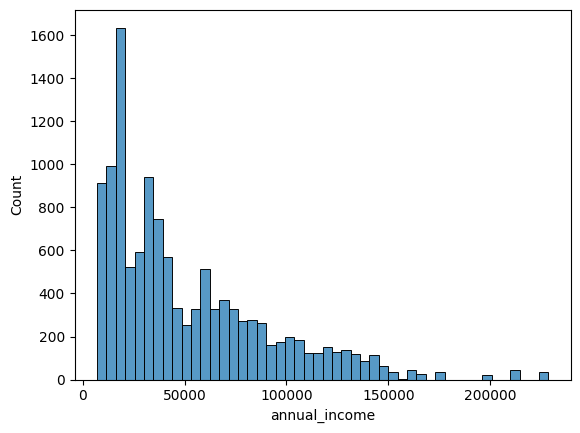

In [16]:
sns.histplot(x=df2["annual_income"])

<Axes: xlabel='monthly_inhand_salary', ylabel='Count'>

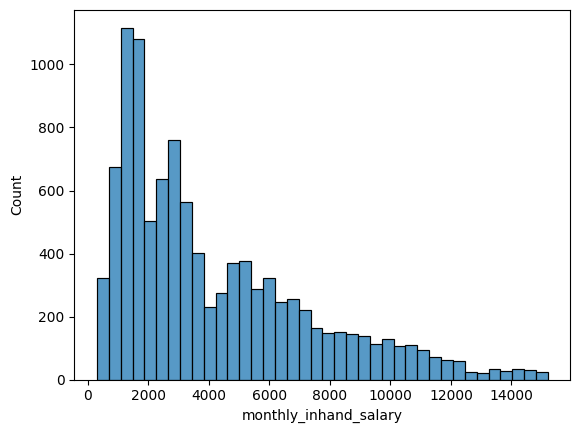

In [17]:
sns.histplot(x=df2["monthly_inhand_salary"])

<Axes: xlabel='monthly_inhand_salary', ylabel='Count'>

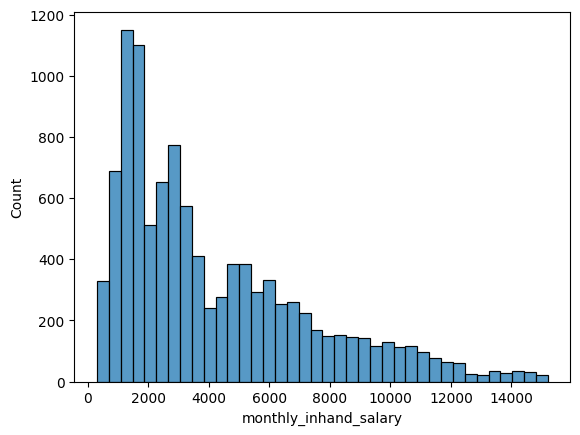

In [18]:
sns.histplot(x=df["monthly_inhand_salary"])

In [19]:
df2["monthly_inhand_salary"].describe()

count    10327.000000
mean      4185.407802
std       3174.231206
min        303.645417
25%       1623.259583
50%       3082.271667
75%       5968.126667
max      15204.633333
Name: monthly_inhand_salary, dtype: float64

In [20]:
df["num_bank_accounts"].describe()

count    12500.000000
mean        16.939920
std        114.350815
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1756.000000
Name: num_bank_accounts, dtype: float64

In [21]:
# Calcular la media de 'monthly_inhand_salary' para cada ocupación
mean_monthly_salary_by_occupation = df.groupby('occupation')['monthly_inhand_salary'].mean()
mean_monthly_salary_by_occupation

occupation
Accountant       4296.482503
Architect        4282.116680
Developer        4157.447979
Doctor           4080.044986
Engineer         4186.279894
Entrepreneur     4139.257073
Journalist       3984.069895
Lawyer           4214.129105
Manager          4256.964975
Mechanic         4127.919844
Media_Manager    4103.903234
Musician         4354.977551
Scientist        4280.225040
Teacher          4019.273704
Writer           4291.932179
_______          4207.651802
Name: monthly_inhand_salary, dtype: float64

Vemos que en general el comportamiento es similar por lo que los valores faltantes podrian imputarse utilizando SimpleImputer

<Axes: xlabel='num_bank_accounts', ylabel='Count'>

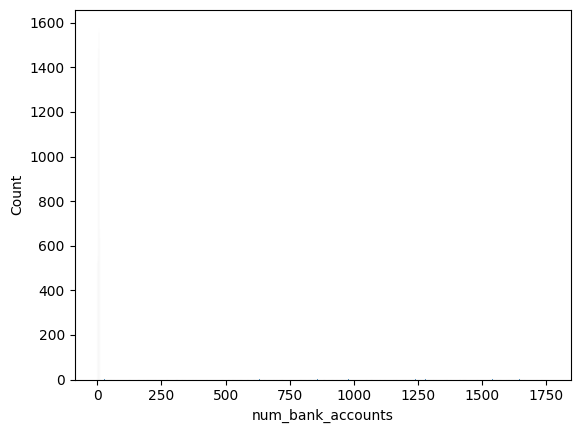

In [22]:
sns.histplot(x=df2["num_bank_accounts"])

In [23]:
# Calcula el IQR para toda la columna 'num_bank_accounts'
Q1 = df2['num_bank_accounts'].quantile(0.25)
Q3 = df2['num_bank_accounts'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Calcula la mediana de 'num_bank_accounts'
average_bank_accounts = df2['num_bank_accounts'].median()

# Función para reemplazar anómalos por encima del límite superior con el promedio general
def replace_anomalies(bank_accounts):
    if bank_accounts > upper_bound:
        return average_bank_accounts
    else:
        return bank_accounts

# Aplica la función a la columna 'num_bank_accounts'
df2.loc[:,'num_bank_accounts'] = df2['num_bank_accounts'].apply(replace_anomalies)


<Axes: xlabel='num_bank_accounts', ylabel='Count'>

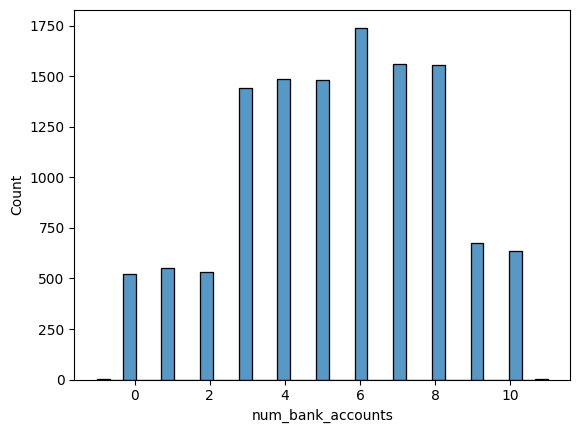

In [24]:
sns.histplot(x=df2["num_bank_accounts"])

In [25]:
df2[df2["num_bank_accounts"]==-1]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
3791,CUS_0x4f2a,40.0,Engineer,144586.537864,NaN,-1,6,1,2.0,10,...,6.0,1151.70,38.278518,22.0,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,0
5461,CUS_0xa878,54.0,Engineer,117851.070000,9870.922500,-1,6,7,0.0,27,...,1.0,607.78,34.041733,21.0,No,0.000000,467.415825,High_spent_Small_value_payments,779.676425,1
5901,CUS_0x43bc,36.0,Lawyer,22312.070000,2013.339167,-1,3,4,3.0,9,...,3.0,51.37,30.059211,23.0,No,32.891186,23.003094,High_spent_Medium_value_payments,395.439637,0
6954,CUS_0x5993,41.0,Developer,30352.110000,2317.342500,-1,4,7,1.0,8,...,0.0,644.57,32.937399,24.0,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,0


In [26]:
df2 = df2[df2["num_bank_accounts"] != -1]
df2[df2["num_bank_accounts"]==-1]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score


In [27]:
df2.shape

(12177, 22)

<Axes: xlabel='num_credit_card', ylabel='Count'>

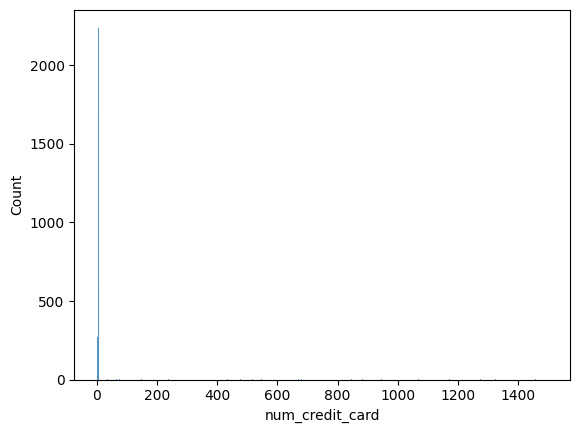

In [28]:
sns.histplot(x=df2["num_credit_card"])

In [29]:
df2["num_credit_card"].describe()

count    12177.000000
mean        22.999918
std        131.199403
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max       1499.000000
Name: num_credit_card, dtype: float64

In [30]:
# Calcula el IQR para toda la columna 'num_credit_card'
Q1 = df2['num_credit_card'].quantile(0.25)
Q3 = df2['num_credit_card'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Calcula el promedio general de 'num_bank_accounts'
average_credit_card = df2['num_credit_card'].median()

# Función para reemplazar anómalos por encima del límite superior con el promedio general
def replace_anomalies(credit_cards):
    if credit_cards > upper_bound:
        return average_credit_card
    else:
        return credit_cards

# Aplica la función a la columna 'num_bank_accounts'
df2.loc[:, 'num_credit_card'] = df2['num_credit_card'].apply(replace_anomalies)


<Axes: xlabel='num_credit_card', ylabel='Count'>

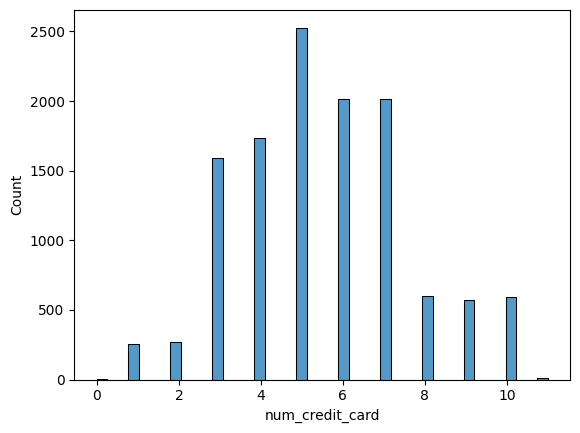

In [31]:
sns.histplot(x=df2["num_credit_card"])

In [32]:
df2[df2["interest_rate"]>100]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
20,CUS_0x132f,41.0,Musician,19514.88,NaN,7,5,5240,0.0,26,...,4.0,881.40,28.781888,19.0,No,0.000000,99.141541,High_spent_Small_value_payments,343.682459,1
69,CUS_0x308b,43.0,Doctor,45207.54,3507.295000,8,8,2724,6.0,24,...,13.0,2497.48,25.094303,16.0,Yes,148.913273,331.925729,!@9#%8,159.890497,1
89,CUS_0x3861,53.0,_______,17992.78,1769.397917,3,5,570,0.0,8,...,3.0,565.22,33.464388,19.0,No,0.000000,79.040224,Low_spent_Small_value_payments,387.899568,1
91,CUS_0x2652,22.0,Teacher,18305.25,1557.437500,2,1,207,0.0,14,...,3.0,363.51,35.591861,20.0,No,0.000000,187.334760,Low_spent_Small_value_payments,258.408990,0
103,CUS_0x7878,19.0,Developer,28665.76,2582.813333,7,3,713,1.0,16,...,0.0,1237.46,33.533477,24.0,No,22.688178,175.792614,Low_spent_Small_value_payments,349.800541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12376,CUS_0xb57,19.0,Architect,63248.52,5074.710000,7,10,268,3.0,11,...,10.0,2111.68,23.260316,10.0,Yes,134.643484,270.826735,Low_spent_Medium_value_payments,NaN,1
12389,CUS_0x22c4,27.0,Media_Manager,80288.08,6961.673333,7,10,4962,6.0,15,...,8.0,2848.95,37.569531,13.0,Yes,400.593501,189.686614,High_spent_Medium_value_payments,NaN,0
12423,CUS_0x965d,38.0,Doctor,96048.00,8139.000000,3,4,101,2.0,8,...,NaN,875.35,26.803655,16.0,No,156.926470,817.804760,Low_spent_Medium_value_payments,NaN,0
12449,CUS_0x94de,37.0,Writer,61167.90,4912.325000,3,2,1347,4.0,10,...,4.0,1354.88,32.607804,15.0,No,176.742422,312.381541,Low_spent_Medium_value_payments,NaN,0


<Axes: xlabel='interest_rate', ylabel='Count'>

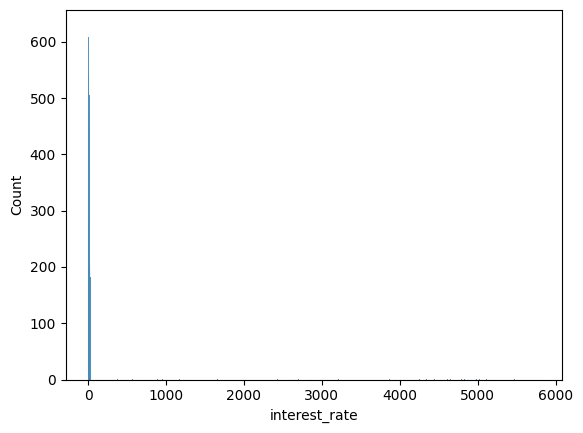

In [33]:
sns.histplot(x=df2["interest_rate"])

In [34]:
# Establece un umbral razonable para 'interest_rate'
umbral_interes = 100

# Calcula la mediana de 'interest_rate'
median_interest_rate = df2['interest_rate'].median()

# Función para reemplazar anómalos con la mediana
def replace_high_interest(rate):
    if rate > umbral_interes:
        return median_interest_rate
    else:
        return rate

# Aplica la función a la columna 'interest_rate'
df2.loc[:, 'interest_rate']= df2['interest_rate'].apply(replace_high_interest)


<Axes: xlabel='interest_rate', ylabel='Count'>

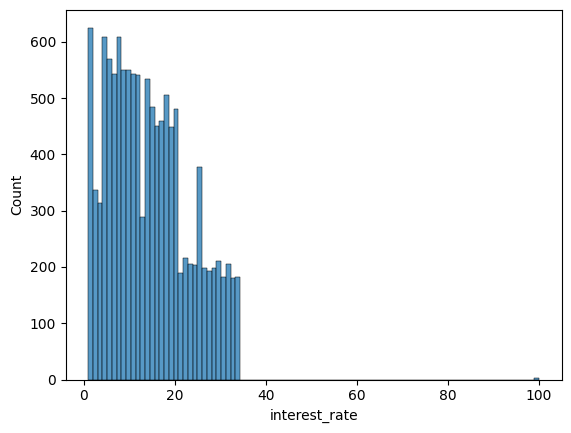

In [35]:
sns.histplot(x=df2["interest_rate"])

In [36]:
df3 = df2.copy()

<Axes: xlabel='num_of_loan', ylabel='Count'>

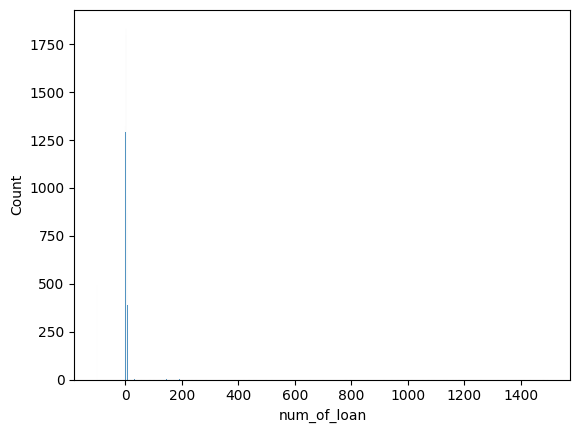

In [37]:
sns.histplot(x=df3["num_of_loan"])

In [38]:
# Calcula Q3 y IQR para 'num_of_loan'
Q3_loan = df2['num_of_loan'].quantile(0.75)
IQR_loan = df2['num_of_loan'].quantile(0.75) - df2['num_of_loan'].quantile(0.25)

# Establece el límite superior
upper_limit_loan = Q3_loan + 1.5 * IQR_loan

# Calcula la mediana de 'num_of_loan'
median_loan = df2['num_of_loan'].median()

# Función para reemplazar valores anómalos con la mediana
def replace_loan_anomalies(loan):
    if loan > upper_limit_loan:
        return median_loan
    else:
        return loan

# Aplica la función a la columna 'num_of_loan'
df2.loc[:,'num_of_loan'] = df2['num_of_loan'].apply(replace_loan_anomalies)


<Axes: xlabel='num_of_loan', ylabel='Count'>

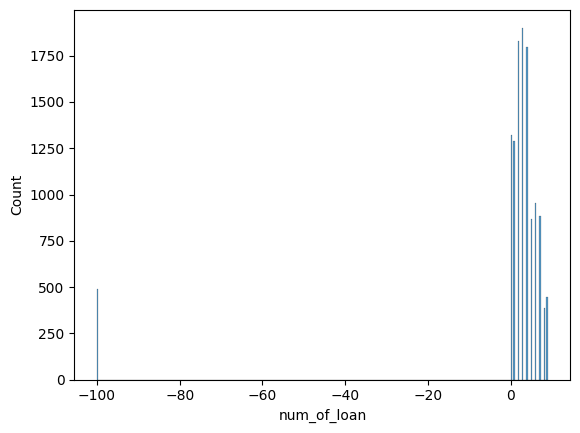

In [39]:
sns.histplot(df2["num_of_loan"])

Tenemos que ver si eliminamos aquellas observaciones que tienen un num_of_loan menor a 0

<Axes: xlabel='delay_from_due_date', ylabel='Count'>

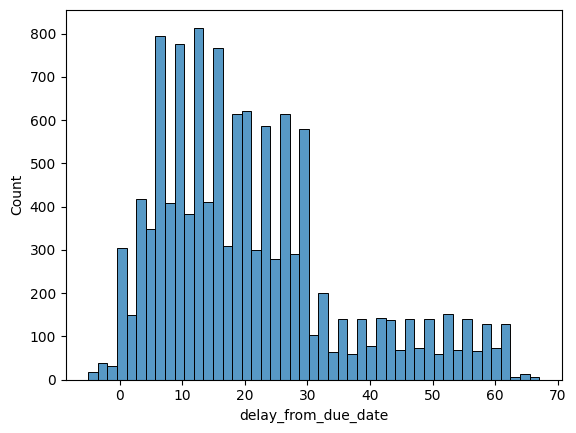

In [40]:
sns.histplot(df2["delay_from_due_date"])

In [41]:
# Filtra las filas donde "num_of_delayed_payment" es NaN
filas_con_valores_faltantes = df2[df2['num_of_delayed_payment'].isna()]

# Muestra las filas con valores faltantes
print(filas_con_valores_faltantes)

      customer_id   age    occupation  annual_income  monthly_inhand_salary  \
11     CUS_0xc0ab  33.0      Engineer       88640.24            7266.686667   
33     CUS_0x4004  44.0        Writer       58317.00            4664.750000   
49     CUS_0x22a3  38.0        Doctor       95956.50            8279.375000   
89     CUS_0x3861  53.0       _______       17992.78            1769.397917   
134    CUS_0xae51  46.0  Entrepreneur       24585.55            2316.795833   
...           ...   ...           ...            ...                    ...   
12465  CUS_0x11c7  53.0     Architect       36817.94            3198.161667   
12469  CUS_0x4a8f  24.0       _______       34493.92            3043.493333   
12477  CUS_0x40ad  20.0     Scientist       65858.48            5421.206667   
12482  CUS_0x1285  43.0     Architect       10692.16             817.013333   
12495  CUS_0x372c  19.0        Lawyer       42903.79            3468.315833   

       num_bank_accounts  num_credit_card  interest

In [42]:
df2['num_of_delayed_payment'].describe()

count    11357.000000
mean        32.181562
std        232.496497
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4293.000000
Name: num_of_delayed_payment, dtype: float64

<Axes: xlabel='num_of_delayed_payment', ylabel='Count'>

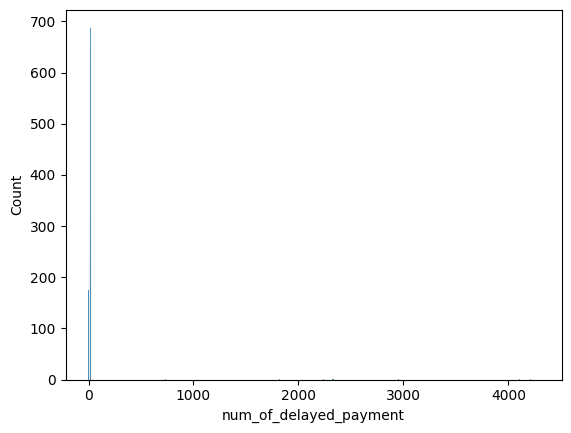

In [43]:
sns.histplot(df2["num_of_delayed_payment"])

In [44]:
# Calcula Q3 y IQR para 'num_of_delayed_payment'
Q3_delayed = df2['num_of_delayed_payment'].quantile(0.75)
IQR_delayed = df2['num_of_delayed_payment'].quantile(0.75) - df2['num_of_delayed_payment'].quantile(0.25)

# Establece el límite superior
upper_limit_delayed = Q3_delayed + 1.5 * IQR_delayed

# Calcula la mediana de 'num_of_delayed_payment'
median_delayed = df2['num_of_delayed_payment'].median()

# Función para reemplazar valores anómalos con la mediana
def replace_delayed_anomalies(value):
    if value > upper_limit_delayed:
        return median_delayed
    else:
        return value

# Aplica la función a la columna 'num_of_delayed_payment'
df2.loc[:,'num_of_delayed_payment'] = df2['num_of_delayed_payment'].apply(replace_delayed_anomalies)


<Axes: xlabel='num_of_delayed_payment', ylabel='Count'>

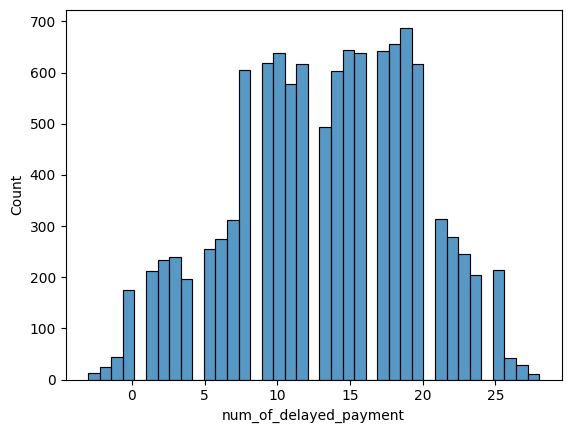

In [45]:
sns.histplot(df2["num_of_delayed_payment"])

Tenemos que ver que hacemos con los valores negativos de esta columna y los valores faltantes (840 valores faltantes) 

In [46]:
df2["changed_credit_limit"].round(2)

0        11.27
1         5.42
2         7.10
3         1.99
4         2.58
         ...  
12495     5.10
12496     5.69
12497     5.38
12498    18.31
12499    11.50
Name: changed_credit_limit, Length: 12177, dtype: float64

In [47]:
df2["changed_credit_limit"].describe()

count    11929.000000
mean        10.407426
std          6.798264
min         -6.130000
25%          5.380000
50%          9.410000
75%         14.920000
max         36.970000
Name: changed_credit_limit, dtype: float64

<Axes: xlabel='changed_credit_limit', ylabel='Count'>

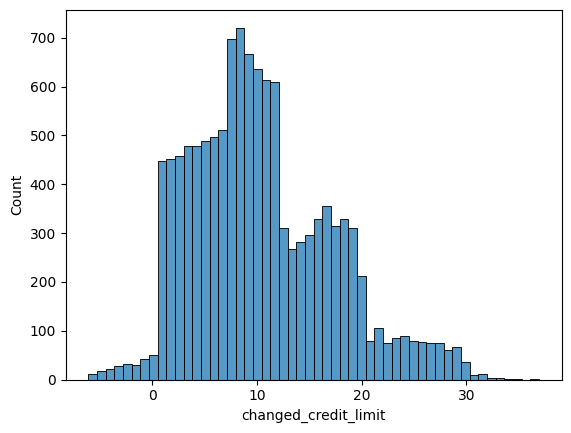

In [48]:
sns.histplot(df2["changed_credit_limit"])

Tenemos que ver que hacemos con los valores negativos y con los valores faltantes

<Axes: xlabel='num_credit_inquiries', ylabel='Count'>

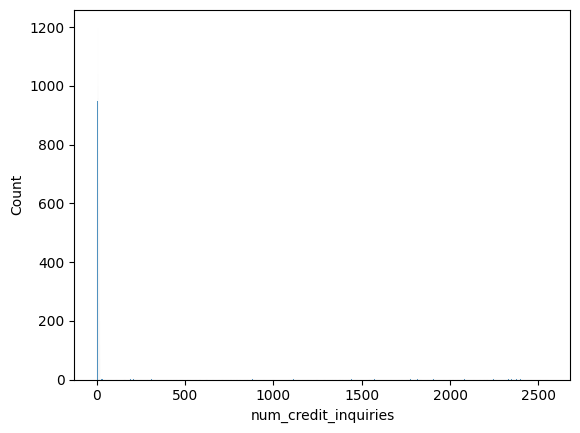

In [49]:
sns.histplot(x=df2["num_credit_inquiries"])

In [50]:
df2["num_credit_inquiries"].describe()

count    11925.000000
mean        26.204780
std        181.199335
min          0.000000
25%          4.000000
50%          6.000000
75%         10.000000
max       2554.000000
Name: num_credit_inquiries, dtype: float64

In [51]:
# Calcula Q3 y IQR para 'num_credit_inquiries'
Q3_inquiries = df2['num_credit_inquiries'].quantile(0.75)
IQR_inquiries = df2['num_credit_inquiries'].quantile(0.75) - df2['num_credit_inquiries'].quantile(0.25)

# Establece el límite superior
upper_limit_inquiries = Q3_inquiries + 1.5 * IQR_inquiries

# Calcula la mediana de 'num_credit_inquiries'
median_inquiries = df2['num_credit_inquiries'].median()

# Función para reemplazar valores anómalos con la mediana
def replace_inquiries_anomalies(value):
    if value > upper_limit_inquiries:
        return median_inquiries
    else:
        return value

# Aplica la función a la columna 'num_credit_inquiries'
df2.loc[:,'num_credit_inquiries'] = df2['num_credit_inquiries'].apply(replace_inquiries_anomalies)


<Axes: xlabel='num_credit_inquiries', ylabel='Count'>

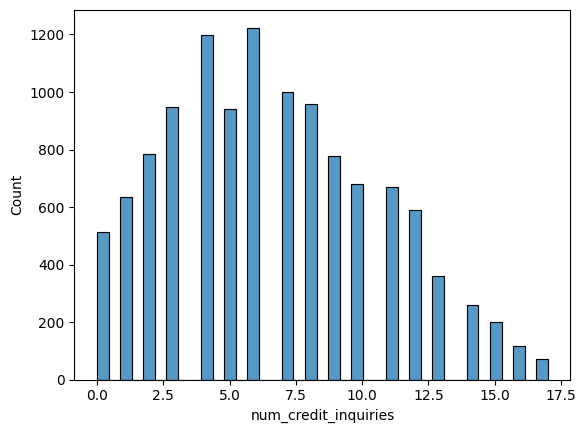

In [52]:
sns.histplot(x=df2["num_credit_inquiries"])

Tenemos que ver que hacemos con los valores faltantes de esta columna

In [53]:
df2.shape

(12177, 22)

<Axes: xlabel='outstanding_debt', ylabel='Count'>

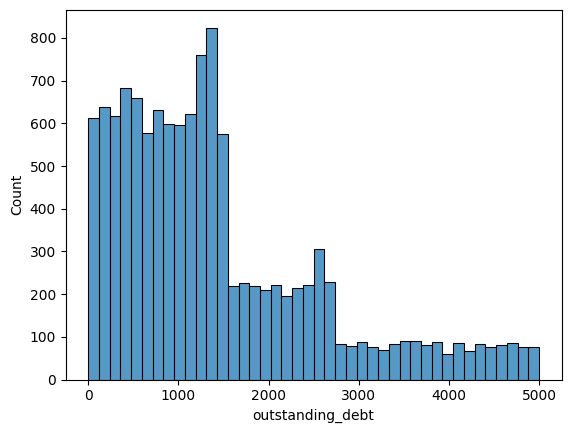

In [54]:
sns.histplot(x=df2["outstanding_debt"])

<Axes: xlabel='credit_utilization_ratio', ylabel='Count'>

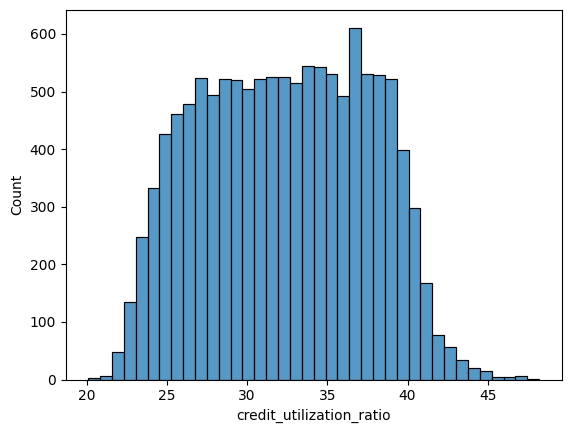

In [55]:
sns.histplot(x=df2["credit_utilization_ratio"])

<Axes: xlabel='credit_history_age', ylabel='Count'>

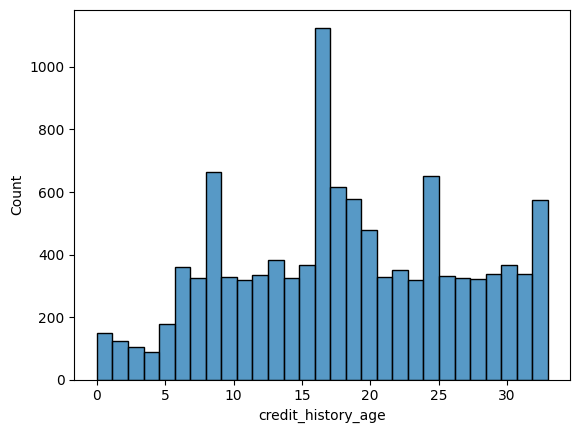

In [56]:
sns.histplot(x=df2["credit_history_age"])

In [57]:
df2["credit_history_age"].isna().sum()

1088

Tenemos que tratar los valores faltantes de esta columna. Tiene 1088 valores faltantes

<Axes: xlabel='payment_of_min_amount', ylabel='count'>

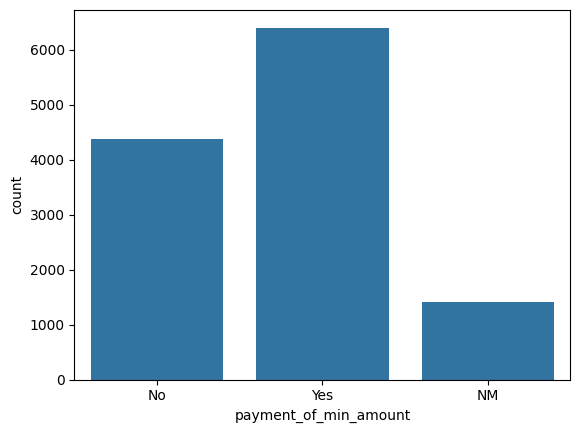

In [58]:
sns.countplot(x=df2["payment_of_min_amount"])

Tenemos que ver que significa NM

<Axes: xlabel='total_emi_per_month', ylabel='Count'>

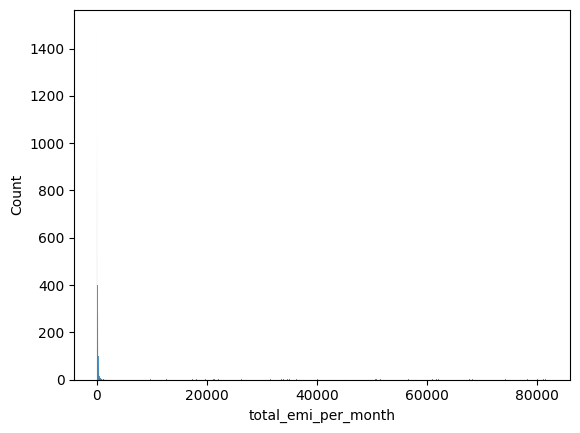

In [59]:
sns.histplot(df2["total_emi_per_month"])

In [60]:
df2["total_emi_per_month"].describe()

count    12177.000000
mean      1490.835252
std       8576.212254
min          0.000000
25%         31.605566
50%         73.023434
75%        169.529221
max      81971.000000
Name: total_emi_per_month, dtype: float64

In [61]:
df2[df2["total_emi_per_month"]>5000]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
44,CUS_0xaedb,20.0,_______,85554.03,7185.502500,4,2,3,0.0,12,...,3.0,1095.73,41.513288,NaN,No,81050.0,78.798183,High_spent_Large_value_payments,879.752067,0
47,CUS_0x75c6,30.0,Teacher,87215.68,7489.973333,2,6,8,2.0,2,...,0.0,680.77,35.622883,21.0,NM,19734.0,304.202810,High_spent_Medium_value_payments,573.112506,0
64,CUS_0xab76,26.0,_______,60162.10,5197.508333,5,7,5,7.0,18,...,9.0,1037.45,32.078619,13.0,Yes,50812.0,231.766467,Low_spent_Medium_value_payments,347.770639,0
98,CUS_0x398d,38.0,Media_Manager,108147.30,8926.275000,3,6,6,4.0,14,...,2.0,1113.06,35.891398,29.0,Yes,37514.0,946.155510,Low_spent_Small_value_payments,25.292408,0
202,CUS_0x543f,24.0,Mechanic,51824.94,4417.745000,6,7,26,8.0,33,...,8.0,2958.02,33.653547,7.0,Yes,21784.0,121.331970,High_spent_Medium_value_payments,312.783075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12292,CUS_0x16a5,42.0,_______,10027.07,896.589167,8,5,9,3.0,9,...,5.0,168.72,23.312242,21.0,No,73384.0,32.743223,Low_spent_Medium_value_payments,NaN,0
12408,CUS_0xa66c,24.0,Accountant,74349.18,6133.765000,0,3,2,2.0,14,...,5.0,929.91,26.655590,28.0,No,12736.0,375.168485,Low_spent_Large_value_payments,NaN,0
12420,CUS_0x6044,36.0,Journalist,19147.20,1692.600000,3,5,5,0.0,6,...,0.0,1347.02,30.228320,27.0,Yes,75639.0,119.855743,Low_spent_Small_value_payments,NaN,0
12442,CUS_0xc22f,34.0,Scientist,34671.15,2637.262500,6,3,16,2.0,26,...,4.0,1071.97,22.558202,21.0,NM,49430.0,121.648177,Low_spent_Large_value_payments,NaN,0


<Axes: xlabel='total_emi_per_month'>

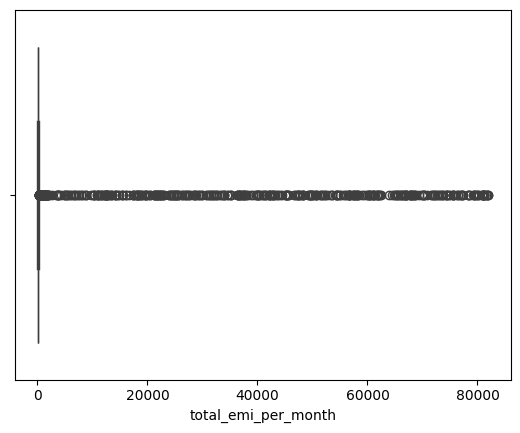

In [62]:
sns.boxplot(x=df2["total_emi_per_month"])

Tenemos que ver que haremos con esta variable, ya que presenta varios outliers. Quizás sea mejor no utilizarla dentro del análisis.

<Axes: xlabel='amount_invested_monthly', ylabel='Count'>

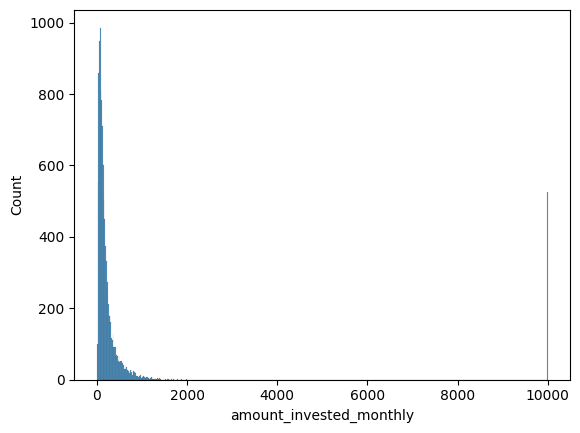

In [63]:
sns.histplot(x=df2["amount_invested_monthly"])

In [64]:
df2[df2["amount_invested_monthly"]>4000]

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,0
72,CUS_0x6c2e,47.0,Mechanic,18681.46,1584.788750,2,3,9,2.0,6,...,3.0,327.88,39.538109,31.0,No,24.821425,10000.0,Low_spent_Small_value_payments,209.557697,0
124,CUS_0xa9a6,27.0,Musician,63536.98,5382.748333,4,5,12,2.0,29,...,9.0,89.62,37.458842,31.0,Yes,69.100853,10000.0,High_spent_Medium_value_payments,529.418377,0
128,CUS_0x4aaa,42.0,Architect,140014.36,11662.863333,3,7,18,4.0,27,...,3.0,1151.70,27.063720,17.0,NM,348.620396,10000.0,High_spent_Large_value_payments,823.086393,0
145,CUS_0x4831,43.0,Mechanic,34766.06,3133.171667,0,1,11,-100.0,4,...,0.0,1374.23,22.850368,NaN,No,78.093107,10000.0,Low_spent_Small_value_payments,324.163796,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12445,CUS_0x650,28.0,Lawyer,21471.58,1879.298333,7,3,16,2.0,17,...,4.0,68.06,36.038980,24.0,No,23.498319,10000.0,High_spent_Small_value_payments,NaN,0
12480,CUS_0x944e,24.0,Architect,11834.64,688.220417,5,7,10,2.0,27,...,10.0,1095.90,37.728638,13.0,Yes,11.089575,10000.0,Low_spent_Medium_value_payments,NaN,0
12484,CUS_0x3855,27.0,Scientist,118677.54,9963.795000,4,4,6,4.0,3,...,5.0,995.47,39.747228,30.0,No,237.106366,10000.0,High_spent_Medium_value_payments,NaN,0
12489,CUS_0x1619,54.0,Media_Manager,20059.98,1523.665000,8,5,12,3.0,25,...,8.0,909.01,32.473773,16.0,No,45.076827,10000.0,Low_spent_Small_value_payments,NaN,1


Que hacemos con los valores superiores a 10000? Debemos analizar esta situacion ya que presenta mas de 500 observaciones con este comportamiento

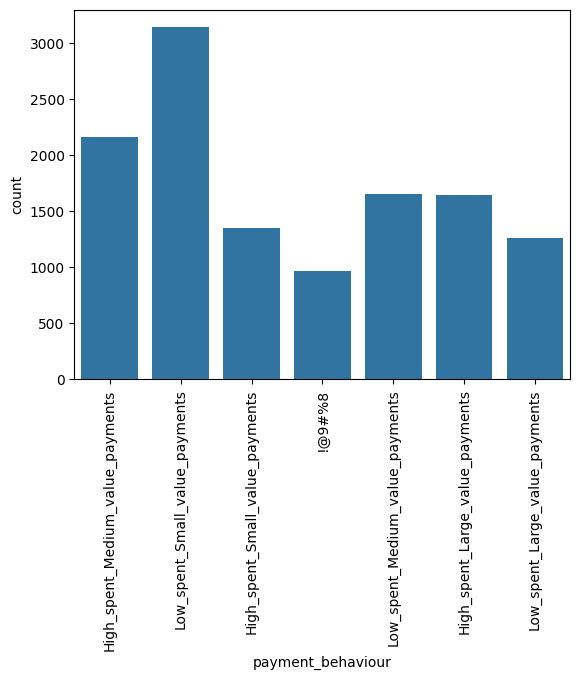

In [65]:
sns.countplot(x=df2["payment_behaviour"])
plt.xticks(rotation=90)  # Rota las etiquetas del eje x si son muy largas
plt.show()

In [66]:
df2.loc[:,'payment_behaviour']= df2['payment_behaviour'].replace("!@9#%8",np.nan)

In [67]:
df2["monthly_balance"].round(2)

0        358.12
1        356.08
2        895.49
3        379.22
4        364.00
          ...  
12495       NaN
12496       NaN
12497       NaN
12498       NaN
12499       NaN
Name: monthly_balance, Length: 12177, dtype: float64

In [68]:
df2["monthly_balance"].describe()

count    1.182900e+04
mean    -2.817933e+22
std      3.064818e+24
min     -3.333333e+26
25%      2.698532e+02
50%      3.391746e+02
75%      4.705188e+02
max      1.463792e+03
Name: monthly_balance, dtype: float64

In [69]:
df2 = df2[df2["monthly_balance"] > 0]

<Axes: xlabel='monthly_balance', ylabel='Count'>

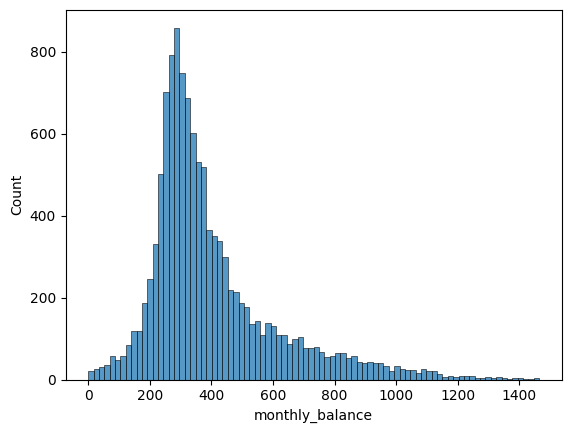

In [70]:
sns.histplot(x=df2["monthly_balance"])

Esta variable presenta varios valores faltantes. Hay que ver que tratamiento le haremos

In [71]:
df2.shape

(11828, 22)

In [72]:
df2['credit_score'] = df2['credit_score'].astype(int)

<Axes: xlabel='credit_score', ylabel='Count'>

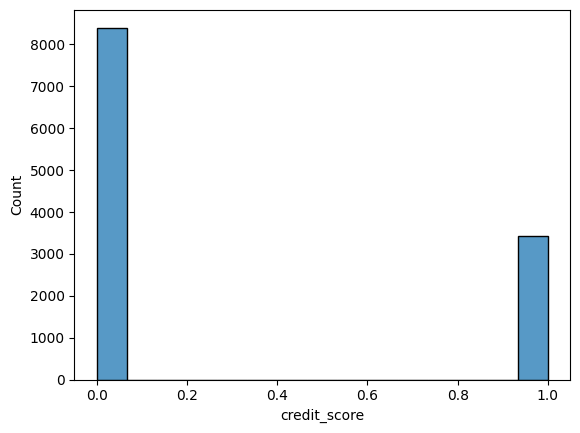

In [73]:
sns.histplot(df2["credit_score"])

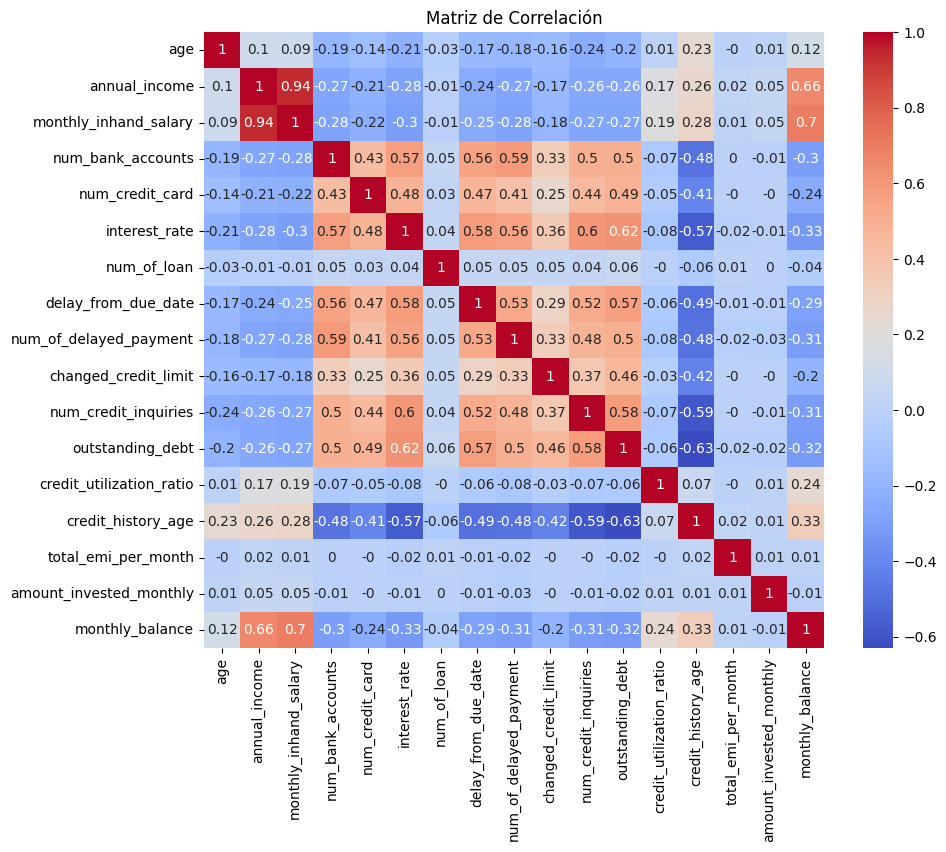

In [74]:

# Selecciona solo las columnas numéricas para la matriz de correlación
df_numeric = df2.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlation_matrix = df_numeric.corr().round(2)

# Para visualizar la matriz de correlación, puedes usar seaborn
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


Variables annual_income y monthly_inhand_salary se encuentran altamente correlacionadas (94% de correlación), por lo que se optará por utilizar solo la variable annual_income.

Todo el preprocesamiento anterior sera evaluado en paralelo a los datos originales (df), para asi evaluar el rendimiento de los modelos en ambos datasets

---
# Modelo de riesgo: Predicción de no pago de clientes
#### Por Daniel Quilodrán, Katherine Rutte

## Introducción

Este informe se enfoca en el desarrollo de un modelo predictivo con el propósito de minimizar los riesgos asociados a la concesión de préstamos. Nuestro objetivo es predecir la probabilidad de que un cliente sea considerado de alto riesgo (representado por un credit_score de 1) o de bajo riesgo (credit_score de 0) en función de su perfil financiero. Los datos disponibles incluyen información detallada de los clientes, como historial crediticio, ingresos, y otros indicadores financieros clave.

Para evaluar el desempeño de nuestros modelos, hemos seleccionado métricas específicas que consideran el desbalance presente en las clases de nuestro conjunto de datos. Dada la importancia de identificar adecuadamente a los clientes de alto riesgo, hemos elegido el Recall como nuestra métrica principal, ya que proporciona una medida directa de la capacidad del modelo para detectar los casos de mayor interés para la institución financiera. Además, consideramos la Precisión para asegurarnos de que los clientes de bajo riesgo no sean incorrectamente clasificados como de alto riesgo, y el F1 Score para balancear estas dos métricas en una sola figura representativa.

Los modelos LightGBMClassifier y DecisionTreeClassifier emergieron como los más prometedores durante la fase de evaluación. Ambos modelos fueron ajustados y evaluados utilizando un preprocesamiento cuidadoso de los datos, que incluyó la estandarización de variables numéricas para manejar la presencia de valores atípicos y la codificación One-Hot para las características categóricas. Además, se implementó la imputación de valores faltantes mediante KNNImputer para mejorar la calidad de la información procesada.

El modelo DecisionTreeClassifier, en particular, fue afinado con Optuna, lo que permitió una selección más precisa de las características más relevantes y la interpretación del modelo. Se descubrió que las variables como el número de tarjetas de crédito, ingresos anuales, número de cuentas bancarias, tasa de interés, edad, entre otras, tienen un impacto significativo en la predicción del riesgo crediticio. Estos hallazgos se alinean con la intuición financiera y refuerzan la confiabilidad de nuestro modelo.

Los resultados obtenidos revelaron que nuestro modelo optimizado supera el rendimiento de un clasificador aleatorio (Dummy) y muestra un Recall de 0.481905, una Precisión de 0.617073 y un F1 Score de 0.541176 para la clase de interés, lo cual consideramos aceptable dada la complejidad del problema y el nivel de desbalance de las clases. Comparativamente, el modelo no optimizado presentó un Recall ligeramente superior, pero con un equilibrio menos favorable entre Precisión y F1 Score. En última instancia, creemos que los resultados obtenidos son prometedores y sugieren que el modelo podría ser una herramienta valiosa para la institución financiera en la toma de decisiones crediticias.

## Carga de datos y EDA

In [75]:
# Cargamos los datos
df = pd.read_parquet("dataset.pq")
df.head(10)

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
5,CUS_0x95ee,31.0,Lawyer,73928.46,5988.705000,4,5,8,0.0,8,...,NaN,548.20,31.580990,32.0,No,0.000000,42.635590,!@9#%8,796.234910,0
6,CUS_0x284a,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,0,...,4.0,352.16,29.187913,31.0,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,0
7,CUS_0x5407,30.0,Media_Manager,34081.38,2611.115000,8,7,15,3.0,30,...,9.0,1704.18,33.823488,15.0,Yes,70.478333,29.326364,High_spent_Medium_value_payments,411.306804,1
8,CUS_0x4157,24.0,Doctor,114838.41,9843.867500,2,5,7,3.0,11,...,8.0,1377.74,27.813354,21.0,No,226.892792,254.571767,High_spent_Large_value_payments,742.922191,0
9,CUS_0xba08,45.0,Journalist,31370.80,NaN,1,6,12,2.0,-2,...,5.0,421.43,37.565053,27.0,No,46.616129,252.644827,Low_spent_Small_value_payments,273.262377,0


In [76]:
df.dtypes

customer_id                  object
age                         float64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                 float64
delay_from_due_date           int64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  int64
dtype: object

- Customer_ID: Identificador para clientes individuales.
- Age: Edad del cliente.
- Occupation: Ocupación o título laboral del cliente.
- Annual_Income: Ingresos anuales del cliente.
- Monthly_Inhand_Salary: La cantidad de dinero que el cliente recibe como salario mensualmente.
- Num_Bank_Accounts: Número de cuentas bancarias que el cliente posee.
- Num_Credit_Card: Número de tarjetas de crédito que el cliente posee.
- Interest_Rate: La tasa de interés asociada a algún aspecto financiero (por ejemplo, préstamos o tarjetas de crédito).
- Num_of_Loan: Número de préstamos que el cliente tiene.
- Delay_from_due_date: Retraso en los pagos con respecto a la fecha de vencimiento.
- Num_of_Delayed_Payment: Número de pagos retrasados.
- Changed_Credit_Limit: Indica si el cliente ha modificado su límite de crédito.
- Num_Credit_Inquiries: Número de consultas de crédito realizadas por el cliente.
- Outstanding_Debt: La cantidad de deuda pendiente.
- Credit_Utilization_Ratio: La proporción de crédito utilizado con respecto al límite de crédito total.
- Credit_History_Age: La antigüedad del historial crediticio del cliente.
- Payment_of_Min_Amount: Comportamiento de pago con respecto a los pagos mínimos requeridos.
- Total_EMI_per_month: Pagos mensuales totales de la Cuota Mensual Equivalente (EMI) realizados por el cliente.
- Amount_invested_monthly: La cantidad que el cliente invierte mensualmente.
- Payment_Behaviour: Comportamiento relacionado con los pagos, posiblemente indicando patrones o tendencias.
- Monthly_Balance: El saldo mensual del cliente en sus cuentas financieras.
- Credit_Score: La puntuación crediticia asociada a la solvencia crediticia del cliente.

El dataset tiene 21 variables y 12500 observaciones. Presenta 5328 celdas vacías, lo cual corresponde a un 2% de los datos. Inicialmente se tienen 18 variables numéricas y 3 variables categóricas o de texto. 
La variable edad es de tipo numérica y tiene 258 valores distintos y no presenta datos faltantes. Presenta algunas anomalias como que el mínimo es -500 (lo cual es imposible debido a que la edad no puede ser negativa y menos pueden ser 500 años), relacionado con lo anterior tambien se puede ver que presenta 104 valores negativos (imposible debido a la naturaleza de la variable). Por otro lado el máximo es de 8678 (imposible). La media es de 33 años.
La variable occupation es de tipo str, corresponde a la ocupación de los clientes, presenta 16 valores 16 distintos. El top 5 de ocupaciones son: lawyer, achitect, engineer, accountant y scientist. 
La variable annual_income es de tipo numérica y representa el ingreso anual (en dólares) del individuo. El mínimo es 7005 y el máximo es 23834698. La mediana es de 37572 y el promedio es de 161620.

## Preparación de datos

En primer lugar se procederá a eliminar la variable 'customer_id' ya que no aporta información relevante al modelo. Considerando que cada observación representa a un único cliente. Posterior a eso nos aseguramos que las columnas se estan leyendo en el formato correcto.

In [77]:
df.drop("customer_id", axis=1, inplace=True)

In [78]:
categorical_columns = ['occupation', 'payment_of_min_amount', 'payment_behaviour']
numerical_columns = ['age',
 'annual_income',
 'monthly_inhand_salary',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'outstanding_debt',
 'credit_utilization_ratio',
 'credit_history_age',
 'total_emi_per_month',
 'amount_invested_monthly',
 'monthly_balance']
target = "credit_score"

# Aseguramos que se esten leyendo bien
for col in categorical_columns:
    df[col] = df[col].astype("category")

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")



Antes de realizar el ColumnTransformer es necesario realizar un tratamiento a algunas variables, ya que por su naturaleza, estas deben presentar solo valores positivos, estas variables son 'age' y 'num_of_delayed_payment'. Por otra parte tambien es necesario tratar el valor desconocido en la variable 'payment_behaviour'.

In [79]:
df.shape

(12500, 21)

In [80]:
# Eliminamos observaciones con edades negativas y mayores a 150
df = df[(df["age"] >0) & (df["age"] < 150)]

# Eliminamos observaciones con num_of_delayed_payment negativo
df = df[(df["num_of_delayed_payment"] != -1) & (df["num_of_delayed_payment"]!=-2) & (df["num_of_delayed_payment"]!=-3)]

In [81]:
df.shape

(12100, 21)

Se eliminaron 400 observaciones, lo que corresponde a un 3.2% del total de las observaciones

In [82]:
# Tratamos valor desconocido en payment_behaviour
df.loc[:,'payment_behaviour']= df['payment_behaviour'].replace("!@9#%8","Unknown")

### Preprocesamiento con ColumnTransformer

In [83]:
# Creando el ColumnTransformer
categorical_columns = ['occupation', 'payment_of_min_amount', 'payment_behaviour']
numerical_columns = ['age',
 'annual_income',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'outstanding_debt',
 'credit_utilization_ratio',
 'credit_history_age',
 'total_emi_per_month',
 'amount_invested_monthly',
 'monthly_balance']
target = "credit_score"


# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_columns),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="if_binary"), categorical_columns)
    ]
).set_output(transform='pandas')

In [84]:
# Prueba del ColumnTransformer
df_prueba = preprocessor.fit_transform(df)
df_prueba

,num__age,num__annual_income,num__num_bank_accounts,num__num_credit_card,num__interest_rate,num__num_of_loan,num__delay_from_due_date,num__num_of_delayed_payment,num__changed_credit_limit,num__num_credit_inquiries,...,cat__payment_of_min_amount_NM,cat__payment_of_min_amount_No,cat__payment_of_min_amount_Yes,cat__payment_behaviour_High_spent_Large_value_payments,cat__payment_behaviour_High_spent_Medium_value_payments,cat__payment_behaviour_High_spent_Small_value_payments,cat__payment_behaviour_Low_spent_Large_value_payments,cat__payment_behaviour_Low_spent_Medium_value_payments,cat__payment_behaviour_Low_spent_Small_value_payments,cat__payment_behaviour_Unknown
0,-0.588235,-0.344779,-0.923077,-0.666667,-0.916667,0.25,-0.833333,-0.888889,0.190675,-0.333333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.294118,-0.048318,-1.230769,-0.666667,-0.666667,-0.50,-0.833333,-1.111111,-0.418859,-0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.058824,1.992592,-1.538462,-0.333333,-0.500000,0.00,-0.555556,-0.888889,-0.243813,-0.500000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.294118,-0.126664,-1.230769,-0.333333,-0.833333,-25.75,-0.777778,-0.555556,-0.776244,-0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.705882,-0.035131,0.307692,-0.333333,-0.750000,-25.75,-0.944444,0.111111,-0.714769,-0.333333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,-0.823529,0.103475,-1.846154,-0.666667,-0.666667,-0.50,-0.500000,NaN,-0.452201,-0.833333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12496,0.705882,-0.390637,-1.538462,-1.666667,-0.750000,0.25,-0.944444,-1.555556,-0.390727,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12497,1.000000,-0.004222,-1.538462,-0.666667,-0.750000,0.00,-0.611111,-0.555556,-0.423027,-0.500000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12498,-0.235294,-0.328033,1.230769,0.666667,1.250000,0.50,0.833333,1.222222,0.924199,0.500000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df_prueba.dtypes

num__age                                                   float64
num__annual_income                                         float64
num__num_bank_accounts                                     float64
num__num_credit_card                                       float64
num__interest_rate                                         float64
num__num_of_loan                                           float64
num__delay_from_due_date                                   float64
num__num_of_delayed_payment                                float64
num__changed_credit_limit                                  float64
num__num_credit_inquiries                                  float64
num__outstanding_debt                                      float64
num__credit_utilization_ratio                              float64
num__credit_history_age                                    float64
num__total_emi_per_month                                   float64
num__amount_invested_monthly                               flo

### Holdout

Se utilizarán un 75% de los datos para entrenamiento, un 15% para validación y un 15% para prueba

In [86]:
# Holdout - División en conjuntos de entrenamiento, validación y prueba
# Separar las características y la etiqueta
X = df.drop(columns=["credit_score"])
y = df["credit_score"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Dividir el conjunto de prueba en prueba y validación
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [87]:
X_train.columns

Index(['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance'],
      dtype='object')

### Datos nulos

<Axes: >

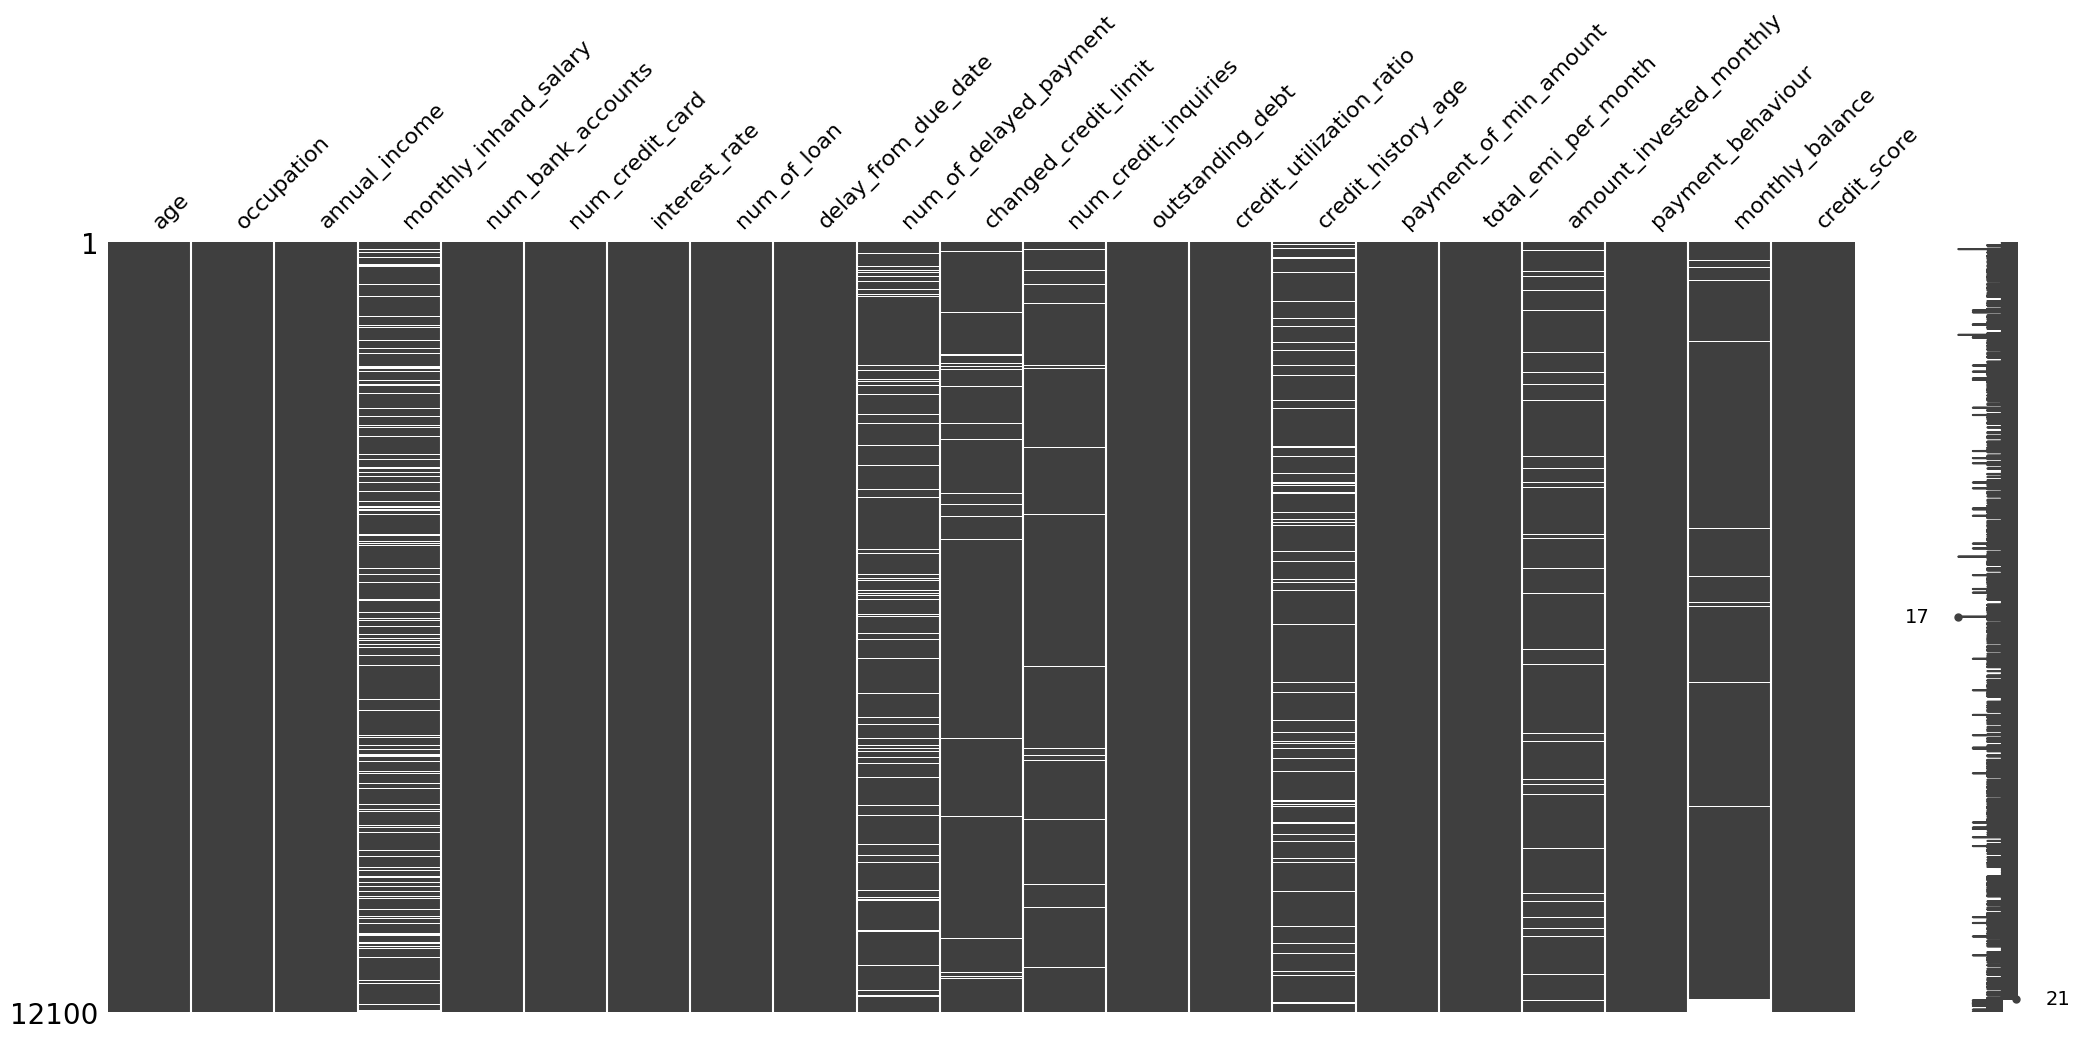

In [88]:
msno.matrix(df)

En la figura anterior no se logra identificar patrones dentro de los datos faltantes, por lo que se asumirá que estos son MCAR.

La variable 'monthly_inhand_salary' presenta una gran cantidad de valores nulos, además se vió que esta se encuentra fuertemente correlacionada con la variable 'annual_income', por lo que se toma la decisión de no considerar esta variable en el modelado. 

Con respecto al resto de variables, se procederá a utilizar KNNImputer, con el objetivo de eliminar la menor cantidad de filas posibiles ya que no se poseen muchas observaciones.

In [89]:
df.drop("monthly_inhand_salary", axis=1, inplace=True)

In [90]:
# Columnas con datos nulos
nan_num_cols = ["num_of_delayed_payment", "changed_credit_limit", "num_credit_inquiries", "credit_history_age", "amount_invested_monthly", "monthly_balance"]

In [91]:
# Estadistica descriptiva antes de la imputación
df[nan_num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
num_of_delayed_payment,11280.0,3.241436e+01,2.332717e+02,0.000000e+00,9.000000,14.000000,18.000000,4293.000000
changed_credit_limit,11854.0,1.043430e+01,6.804487e+00,-6.130000e+00,5.390000,9.440000,14.987500,36.970000
num_credit_inquiries,11850.0,2.612549e+01,1.809995e+02,0.000000e+00,4.000000,6.000000,10.000000,2554.000000
credit_history_age,11020.0,1.819120e+01,8.293455e+00,0.000000e+00,12.000000,18.000000,25.000000,33.000000
amount_invested_monthly,11542.0,6.379441e+02,2.047143e+03,0.000000e+00,73.565865,133.830807,261.386485,10000.000000
monthly_balance,11752.0,-2.836397e+22,3.074842e+24,-3.333333e+26,269.627947,338.405689,469.269280,1463.792328


In [92]:
# KNN Imputer.
KNNimputer = KNNImputer(n_neighbors=2, weights="uniform").set_output(transform='pandas')

In [93]:
KNN_imputed_data = KNNimputer.fit_transform(df[nan_num_cols])

In [94]:
# SimpleImputer
SimpleImputer = SimpleImputer(strategy="median").set_output(transform='pandas')

In [95]:
Simple_imputed_data = SimpleImputer.fit_transform(df[nan_num_cols])

In [96]:
KNN_imputed_data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_of_delayed_payment,12100.0,3.179847e+01,2.273051e+02,0.000000e+00,9.000000,14.000000,18.000000,4293.000000
changed_credit_limit,12100.0,1.044387e+01,6.769451e+00,-6.130000e+00,5.457500,9.460000,14.940000,36.970000
num_credit_inquiries,12100.0,2.667033e+01,1.816698e+02,0.000000e+00,4.000000,6.000000,10.000000,2554.000000
credit_history_age,12100.0,1.823190e+01,8.152793e+00,0.000000e+00,12.000000,18.000000,25.000000,33.000000
amount_invested_monthly,12100.0,6.580679e+02,2.036412e+03,0.000000e+00,75.538944,139.039146,279.214041,10000.000000
monthly_balance,12100.0,-4.793388e+24,2.793881e+25,-3.333333e+26,264.228043,333.197644,462.068588,1463.792328


In [97]:
Simple_imputed_data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_of_delayed_payment,12100.0,3.116645e+01,2.252756e+02,0.000000e+00,9.000000,14.000000,18.000000,4293.000000
changed_credit_limit,12100.0,1.041408e+01,6.736419e+00,-6.130000e+00,5.510000,9.440000,14.770000,36.970000
num_credit_inquiries,12100.0,2.570967e+01,1.791426e+02,0.000000e+00,4.000000,6.000000,10.000000,2554.000000
credit_history_age,12100.0,1.817413e+01,7.914840e+00,0.000000e+00,13.000000,18.000000,24.000000,33.000000
amount_invested_monthly,12100.0,6.146966e+02,2.002173e+03,0.000000e+00,76.152504,133.830807,249.765908,10000.000000
monthly_balance,12100.0,-2.754821e+22,3.030303e+24,-3.333333e+26,271.816446,338.405689,462.047310,1463.792328


### Feature Engineering

Aqui si alcanzo puedo discretizar la variable de la edad

## Baseline

In [98]:
# Separar las características y la etiqueta
X = df.drop(columns=["credit_score"])
y = df["credit_score"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Dividir el conjunto de prueba en prueba y validación
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [99]:
# Fijamos una semilla
np.random.seed(42)
# Definir los clasificadores en una lista
classifiers = [
    ('Dummy', DummyClassifier(strategy='stratified')),
    ('LogisticRegression', LogisticRegression()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('SVC', SVC()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LightGBMClassifier', LGBMClassifier()),
    ('XGBClassifier', XGBClassifier())
]

In [100]:
# Preprocesador Compuesto: Inputación + Escalamiento/Codificación.

# Pipeline Numerica
num_pipe = Pipeline(
    steps=[
        ("imputer_num", KNNImputer(n_neighbors=2, weights="uniform")),
        ("scaler", RobustScaler()),
    ]
)

# Preprocesador Compuesto
prep = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numerical_columns),
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_columns),
    ]
).set_output(transform='pandas')

prep

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer_num',
                                                  KNNImputer(n_neighbors=2)),
                                                 ('scaler', RobustScaler())]),
                                 ['age', 'annual_income', 'num_bank_accounts',
                                  'num_credit_card', 'interest_rate',
                                  'num_of_loan', 'delay_from_due_date',
                                  'num_of_delayed_payment',
                                  'changed_credit_limit',
                                  'num_credit_inquiries', 'outstanding_debt',
                                  'credit_utilization_ratio',
                                  'credit_history_age', 'total_emi_per_month',
                                  'amount_invested_monthly',
                                  'monthly_balance']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['occupation', 'payment_of_min_amount',
                                  'payment_behaviour'])])

In [101]:
# Ajusta el preprocesador y transforma los datos de entrenamiento
X_train_preprocessed = prep.fit_transform(X_train)

# Transforma los datos de validacion
X_val_preprocessed = prep.transform(X_val)

In [102]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Diccionario para almacenar las métricas de cada modelo
metrics_dict = {}

# Loop para entrenar y evaluar cada modelo
for name, classifier in classifiers:
    # Entrenar el clasificador con los datos preprocesados
    classifier.fit(X_train_preprocessed, y_train)

    # Hacer predicciones con los datos de validación preprocesados
    y_pred = classifier.predict(X_val_preprocessed)

    # Calcular métricas
    recall = recall_score(y_val, y_pred, pos_label=1)
    precision = precision_score(y_val, y_pred, pos_label=1)
    f1 = f1_score(y_val, y_pred, pos_label=1)

    # Almacenar métricas
    metrics_dict[name] = {'Recall': recall, 'Precision': precision, 'F1 Score': f1}

    # Imprimir el reporte de clasificación y la matriz de confusión
    print(f"Classification report for {name}:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))



Classification report for Dummy:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      1291
           1       0.29      0.29      0.29       524

    accuracy                           0.59      1815
   macro avg       0.50      0.50      0.50      1815
weighted avg       0.59      0.59      0.59      1815

Confusion Matrix:
 [[927 364]
 [373 151]]
Classification report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      1291
           1       0.00      0.00      0.00       524

    accuracy                           0.71      1815
   macro avg       0.36      0.50      0.42      1815
weighted avg       0.51      0.71      0.59      1815

Confusion Matrix:
 [[1291    0]
 [ 524    0]]


c:\Users\kathe\Desktop\2023-2\LabMDS\Proyecto2\Proyecto_2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kathe\Desktop\2023-2\LabMDS\Proyecto2\Proyecto_2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kathe\Desktop\2023-2\LabMDS\Proyecto2\Proyecto_2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: Unde

Classification report for KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      1291
           1       0.54      0.40      0.46       524

    accuracy                           0.73      1815
   macro avg       0.66      0.63      0.64      1815
weighted avg       0.71      0.73      0.72      1815

Confusion Matrix:
 [[1117  174]
 [ 317  207]]
Classification report for DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1291
           1       0.46      0.51      0.48       524

    accuracy                           0.69      1815
   macro avg       0.63      0.63      0.63      1815
weighted avg       0.70      0.69      0.69      1815

Confusion Matrix:
 [[979 312]
 [257 267]]


c:\Users\kathe\Desktop\2023-2\LabMDS\Proyecto2\Proyecto_2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kathe\Desktop\2023-2\LabMDS\Proyecto2\Proyecto_2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kathe\Desktop\2023-2\LabMDS\Proyecto2\Proyecto_2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Classification report for SVC:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      1291
           1       0.00      0.00      0.00       524

    accuracy                           0.71      1815
   macro avg       0.36      0.50      0.42      1815
weighted avg       0.51      0.71      0.59      1815

Confusion Matrix:
 [[1291    0]
 [ 524    0]]
Classification report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.69      0.53      0.60       524

    accuracy                           0.80      1815
   macro avg       0.76      0.72      0.73      1815
weighted avg       0.79      0.80      0.79      1815

Confusion Matrix:
 [[1165  126]
 [ 246  278]]
[LightGBM] [Info] Number of positive: 2448, number of negative: 6022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000711 seconds

In [103]:
# Convertir las métricas a un DataFrame para una mejor visualización
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')

# Mostrar el DataFrame
print(metrics_df)

                          Recall  Precision  F1 Score
Dummy                   0.288168   0.293204  0.290664
LogisticRegression      0.000000   0.000000  0.000000
KNeighborsClassifier    0.395038   0.543307  0.457459
DecisionTreeClassifier  0.509542   0.461140  0.484134
SVC                     0.000000   0.000000  0.000000
RandomForestClassifier  0.530534   0.688119  0.599138
LightGBMClassifier      0.551527   0.659817  0.600832
XGBClassifier           0.505725   0.629454  0.560847


In [104]:
# Ordenar el DataFrame por la métrica "recall" de manera descendente
metrics_df_sorted = metrics_df.sort_values(by="Recall", ascending=False)

# Mostrar el DataFrame ordenado
print(metrics_df_sorted)


                          Recall  Precision  F1 Score
LightGBMClassifier      0.551527   0.659817  0.600832
RandomForestClassifier  0.530534   0.688119  0.599138
DecisionTreeClassifier  0.509542   0.461140  0.484134
XGBClassifier           0.505725   0.629454  0.560847
KNeighborsClassifier    0.395038   0.543307  0.457459
Dummy                   0.288168   0.293204  0.290664
LogisticRegression      0.000000   0.000000  0.000000
SVC                     0.000000   0.000000  0.000000


La mayoría de los clasificadores implementados tienen un mejor rendimiento que el azar, las únicas excepciones son los modelos de LogisticRegression y SVC que presentan peor desempeño que el azar. En cuanto a la elección de los mejores clasificadores, estos se seleccionaran de acuerdo su rendimiento en la métrica recall, en este caso LightGMBClassifier, DecisionTreeClassifier y RandomForestClassifier son los 3 modelos que presentan mejor rendimiento. En cuanto a LightGBMClassifier este puede ser más efectivo debido a su capacidad para manejar grandes conjuntos de datos y su eficiencia con características categóricas y numéricas. LightGBM es un algoritmo basado en gradient boosting que construye árboles de forma secuencial, donde cada árbol intenta corregir los errores del anterior. Esto lo hace particularmente bueno en encontrar patrones complejos en los datos, lo que podría explicar su mejor rendimiento.

Por otro lado, si evaluamos con respecto al tiempo de rendimiento, los modelos basados en árboles como lightGBM, XGBoost y RandomForest pueden requerir más tiempo para la optimización de sus hiperparámetros (esto a que tienen una mayor cantidad de configuraciones posibles)

## Optimización del modelo

Para esta sección se trabajará con los modelos LightGBMClassifier y DecisionTreeClassifier.

In [105]:
# Definimos los pipelines
# Pipelines para los modelos
pipeline_lgbm = Pipeline(steps=[("preprocessor", prep), 
                                ("feature_selection", SelectKBest(f_classif, k=10)),
                                ("classifier", LGBMClassifier())])
pipeline_dt = Pipeline(steps=[("preprocessor", prep), 
                              ("feature_selection", SelectKBest(f_classif, k=10)),
                              ("classifier", DecisionTreeClassifier())])

In [106]:


def objective(trial):
    # Elige el modelo para tunear
    model_name = trial.suggest_categorical("model", ["lightgbm", "decision_tree"])
    
    # Configura los hiperparámetros para LightGBM
    if model_name == "lightgbm":
        params = {
            "classifier__n_estimators": trial.suggest_int("classifier__n_estimators", 50, 300),
            "classifier__max_depth": trial.suggest_int("classifier__max_depth", 3, 20),
            "classifier__learning_rate": trial.suggest_float("classifier__learning_rate", 0.01, 0.3),
            # Puedes añadir más parámetros aquí
        }
        pipeline = pipeline_lgbm
    # Configura los hiperparámetros para DecisionTree
    else:
        params = {
            "classifier__max_depth": trial.suggest_int("classifier__max_depth", 3, 20),
            "classifier__min_samples_split": trial.suggest_int("classifier__min_samples_split", 2, 20),
            # Puedes añadir más parámetros aquí
        }
        pipeline = pipeline_dt

    pipeline.set_params(**params)
    
    # Utiliza la validación cruzada para evaluar el rendimiento del modelo
    score = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=5, scoring="recall")
    return score.mean()

# Crear un estudio de Optuna y optimizar
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)


[I 2023-12-22 22:47:43,135] A new study created in memory with name: no-name-631e96f7-0c05-41ed-9c97-9fb3254d7d4e
[I 2023-12-22 22:47:46,193] Trial 0 finished with value: 0.44324026543132594 and parameters: {'model': 'decision_tree', 'classifier__max_depth': 13, 'classifier__min_samples_split': 4}. Best is trial 0 with value: 0.44324026543132594.
[I 2023-12-22 22:47:49,722] Trial 1 finished with value: 0.4403639247109886 and parameters: {'model': 'lightgbm', 'classifier__n_estimators': 208, 'classifier__max_depth': 13, 'classifier__learning_rate': 0.20000238049321467}. Best is trial 0 with value: 0.44324026543132594.
[I 2023-12-22 22:47:51,592] Trial 2 finished with value: 0.4661282918075205 and parameters: {'model': 'decision_tree', 'classifier__max_depth': 8, 'classifier__min_samples_split': 10}. Best is trial 2 with value: 0.4661282918075205.
[I 2023-12-22 22:47:53,285] Trial 3 finished with value: 0.4591653102958976 and parameters: {'model': 'decision_tree', 'classifier__max_depth'

In [107]:
best_params = study.best_trial.params
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'model': 'decision_tree', 'classifier__max_depth': 7, 'classifier__min_samples_split': 3}


In [108]:
# Crear el clasificador DecisionTree con los mejores hiperparámetros
optimized_classifier = DecisionTreeClassifier(
    max_depth=7,  # Mejor max_depth encontrado
    min_samples_split=3  # Mejor min_samples_split encontrado
)

# Crear y entrenar el pipeline con el clasificador optimizado
optimized_pipeline = Pipeline(steps=[
    ("preprocessor", prep),  
    ("feature_selection", SelectKBest(f_classif, k=10)),
    ("classifier", optimized_classifier)
])

optimized_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'annual_income',
                                                   'num_bank_accounts',
                                                   'num_credit_card',
                                                   'interest_rate',
                                                   'num_of_loan',
                                                   'delay_from_due_date',
                                                   'num_of_delayed_payment',
                                                   'changed_credit_limit',
                                                   'num_credit_inquiries',
                                                   'outstand...
                                                   'credit_utilization_ratio',
                                                   'credit_history_age',
                                                   'total_emi_per_month',
                                                   'amount_invested_monthly',
                                                   'monthly_balance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['occupation',
                                                   'payment_of_min_amount',
                                                   'payment_behaviour'])])),
                ('feature_selection', SelectKBest()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=7, min_samples_split=3))])

In [109]:
y_val_pred = optimized_pipeline.predict(X_val)
print("Reporte de Clasificación en el Conjunto de Validación:\n", classification_report(y_val, y_val_pred))

Reporte de Clasificación en el Conjunto de Validación:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1291
           1       0.64      0.48      0.55       524

    accuracy                           0.77      1815
   macro avg       0.72      0.69      0.70      1815
weighted avg       0.76      0.77      0.76      1815



In [110]:
y_test_pred = optimized_pipeline.predict(X_test)
print("Reporte de Clasificación en el Conjunto de Prueba:\n", classification_report(y_test, y_test_pred))

Reporte de Clasificación en el Conjunto de Prueba:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1290
           1       0.62      0.48      0.54       525

    accuracy                           0.76      1815
   macro avg       0.71      0.68      0.69      1815
weighted avg       0.75      0.76      0.75      1815



In [111]:
# Métricas para el modelo optimizado
y_test_pred_optimizado = optimized_pipeline.predict(X_test)
metrics_optimizado = {
    "Recall": recall_score(y_test, y_test_pred_optimizado, pos_label=1),
    "Precision": precision_score(y_test, y_test_pred_optimizado, pos_label=1),
    "F1 Score": f1_score(y_test, y_test_pred_optimizado, pos_label=1)

}
metrics_df.loc["Modelo Optimizado"] = metrics_optimizado


In [112]:
metrics_df.loc[["DecisionTreeClassifier", "Modelo Optimizado"]]

,Recall,Precision,F1 Score
DecisionTreeClassifier,0.509542,0.461140,0.484134
Modelo Optimizado,0.481905,0.615572,0.540598


 DecisionTreeClassifier tiene un recall de 0.524809, mientras que el Modelo Optimizado tiene un recall ligeramente más bajo de 0.481905. Aunque DecisionTreeClassifier es ligeramente mejor en términos de recall, la diferencia no es significativa. En cuanto a Precision, el Modelo Optimizado supera al DecisionTreeClassifier, con una precisión de 0.617073 en comparación con 0.480769. Una mayor precisión implica que, de todos los clientes clasificados como riesgosos, una mayor proporción de ellos realmente representa un riesgo.Por Un F1 Score más alto indica un mejor equilibrio entre recall y precisión, el Modelo Optimizado tiene un F1 Score de 0.541176, superando al DecisionTreeClassifier, que tiene un F1 Score de 0.501825, esto sugiere que el Modelo Optimizado logra un mejor equilibrio entre la identificación de clientes riesgosos y la reducción de falsos positivos.

## Interpretabilidad

Se utilizará importancia de las características originales del modelo de clasificación, lo cual es una forma de interpretar la contribución de cada variable a las decisiones del modelo. Utilizar la importancia de las características (feature importance) es un método adecuado para modelos de clasificación basados en árboles, ya que proporciona una visión directa de cómo las diferentes características influyen en la decisión del modelo y además este método es comprensible y fácil de comunicar, lo cual es necesario para compartir los resultados obtenidos con la contraparte y tener un modelo interpretable.

In [113]:

feature_importances = optimized_pipeline.named_steps['classifier'].feature_importances_
# Obtén el transformador OneHotEncoder del ColumnTransformer
ohe = [t for t in optimized_pipeline.named_steps['preprocessor'].transformers_ if t[0] == 'cat'][0][1]
# Características numéricas se mantienen como están
num_features = numerical_columns

# Características categóricas transformadas
cat_features_transformed = ohe.get_feature_names_out(categorical_columns)

# Combina las características numéricas y transformadas
all_features = np.concatenate([numerical_columns, cat_features_transformed])

# Mapea las importancias a las nuevas características
feature_importance_dict = dict(zip(all_features, feature_importances))

# Agrupar importancias por característica original
grouped_importances = {}
for feature in num_features:
    grouped_importances[feature] = feature_importance_dict.get(feature, 0)

for feature in cat_features_transformed:
    original_feature = feature.split("_")[0]
    if original_feature in grouped_importances:
        grouped_importances[original_feature] += feature_importance_dict.get(feature, 0)
    else:
        grouped_importances[original_feature] = feature_importance_dict.get(feature, 0)


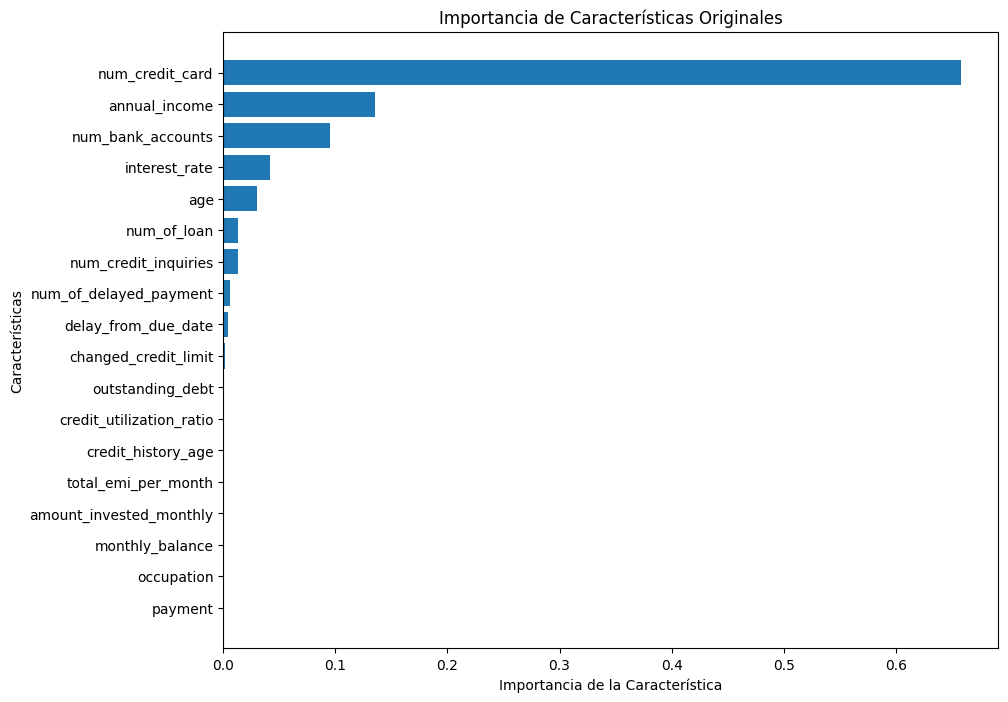

In [114]:
# Ordenar las importancias
sorted_importances = sorted(grouped_importances.items(), key=lambda x: x[1], reverse=True)

# Visualización
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), [x[1] for x in sorted_importances], align='center')
plt.yticks(range(len(sorted_importances)), [x[0] for x in sorted_importances])
plt.xlabel('Importancia de la Característica')
plt.ylabel('Características')
plt.title('Importancia de Características Originales')
plt.gca().invert_yaxis()
plt.show()


De acuerdo a la figura anterior, las caracteristicas con mayor importancia son: num_credit_cards, annual_income, num_bank_accounts, interest_rate, age, num_of_loan, num_credit_inquiries, delay_from_due_date y num_of_delayed_payment. La distribución de importancia no parece ser equitativa, ya que algunas variables tienen una importancia significativamente mayor que otras, lo cual es común en problemas del mundo real donde algunas características tienen mayor poder predictivo.

## Conclusiones

En el transcurso de este proyecto, hemos abordado el desafío de predecir el riesgo crediticio de los clientes de un banco. Nuestro modelo predictivo, basado en un conjunto diverso de variables financieras y personales, ha demostrado ser una herramienta útil para identificar perfiles de riesgo. Aunque no se puede garantizar una solución completa al problema, los resultados obtenidos son prometedores.

Con un enfoque centrado en la métrica de Recall, hemos logrado resultados aceptables, especialmente en la identificación de clientes de alto riesgo. El análisis de las características más relevantes reveló que los factores financieros, como el comportamiento crediticio, son determinantes críticos del riesgo, en lugar de detalles demográficos como la ocupación. Este resultado es coherente con las dinámicas del sector financiero y valida la orientación de nuestro modelo.

El análisis exploratorio de datos (EDA) fue fundamental para revelar la presencia de valores atípicos y para comprender la naturaleza de nuestras variables. Aunque se implementaron estrategias de preprocesamiento, reconocemos que un enfoque más refinado podría mejorar aún más el rendimiento del modelo.

Al comparar el modelo de base con el optimizado, observamos mejoras, aunque no tan marcadas como se esperaba. Esto sugiere que la efectividad del modelo podría estar más ligada a la selección y al procesamiento de las variables que a la optimización de los algoritmos en sí.

Estamos satisfechos con los resultados alcanzados, y nos complacen las conclusiones del análisis de interpretabilidad, que identificó variables con una correlación lógica con el riesgo crediticio. Sin embargo, estamos conscientes de que siempre hay margen para la mejora. En futuros trabajos, sería beneficioso examinar con más detalle las técnicas de escalado, imputación y optimización de hiperparámetros.

Este proyecto ha reforzado la importancia de un proceso de desarrollo estructurado, destacando el valor de la integración de prácticas de MLOps para lograr un flujo de trabajo coherente y replicable. Nuestro deseo es que este modelo sirva como un punto de partida sólido para que la institución financiera tome decisiones más informadas en la emisión de créditos.

En retrospectiva, hemos aprendido mucho sobre la construcción y evaluación de modelos predictivos en un contexto financiero real. Aunque nos habría gustado profundizar en el ajuste fino de modelos más complejos y en estrategias de manejo de datos desbalanceados, estos quedan como oportunidades para futuras investigaciones.

---

## Secciones Requeridas en el Informe

La siguiente lista detalla las secciones que debe contener su notebook para resolver el proyecto. 
Es importante que al momento de desarrollar cada una de las secciones, estas sean escritas en un formato tipo **informe**, donde describan detalladamente cada uno de los puntos realizados.

### 1. Introducción [0.5 puntos]

_Esta sección es literalmente una muy breve introducción con todo lo necesario para entender que hicieron en su proyecto._

- Describir brevemente el problema planteado (¿Qué se intenta predecir?)
- Describir brevemente los datos de entrada que les provee el problema.
- Describir las métricas que utilizarán para evaluar los modelos generados. Eligan **una métrica** adecuada para el desarrollo del proyecto **según la tarea que deben resolver y la institución a la cuál será su contraparte** y luego justifiquen su elección. Considerando que los datos presentan desbalanceo y que el uso de la métrica 'accuracy' sería incorrecto, enfoquen su elección en una de las métricas precision, recall o f1-score y en la clase que será evaluada.
- [Escribir al final] Describir brevemente el modelo que usaron para resolver el problema (incluyendo las transformaciones intermedias de datos).
- [Escribir al final] Indicar si lograron resolver el problema a través de su modelo. Indiquen además si creen que los resultados de su mejor modelo son aceptables y como les fue con respecto al resto de los equipos.

### 2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]

_La idea de esta sección es que cargen y exploren el dataset para así obtener una idea de como son los datos y como se relacionan con el problema._

Cargue los datos y realice un análisis exploratorio de datos para investigar patrones, tendencias y relaciones en un conjunto de datos. Se adjuntan diversos scripts para abodar rápidamente este punto. La descripción de las columnas las pueden encontrar en el siguiente [enlace](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).

**NO deben escribir nada**, solo ejecutar el código y encontrar los patrones con los cuales se basaran para generar el modelo.

### 3. Preparación de Datos [0.5 puntos]

_Esta sección consiste en generar los distintos pasos para preparar sus datos con el fin de luego poder crear su modelo._

#### 3.1 Preprocesamiento con `ColumnTransformer`

- Convierta las columnas mal leidas a sus tipos correspondientes (float, str, etc...)
- Genere un `ColumnTransformer` que:
  - Preprocese datos categóricos y ordinales.
  - Escale/estandarice datos numéricos.
  - Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.

- Luego, pruebe las transformaciones utilizando `fit_transform`.

- Posteriormente, ejecute un Holdout que le permita más adelante evaluar los modelos.

#### 3.2 Holdout 

Ejecute `train_test_split` para generar un conjunto de entrenamiento, validacióny de prueba. 

#### 3.3 Datos nulos.

Como habrá visto, existe la posibilidad de que algunos datos sean nulos. En esta sección se le solicita justificar, previo a comenzar el modelado, decidir si conservar e imputar los datos nulos o eliminar las filas. 

Note que la decisión que tomen aquí puede afectar fuertemente el rendimiento de los modelos. 
Y como siempre, más adelante tienen el espacio para experimentar con ambas opciones.

#### 3.4 Feature Engineering [Bonus - 0.5 puntos]

En esta sección, se espera que apliquen su conocimiento y creatividad para identificar y construir características que brinden una mejor orientación a su modelo para identificar los casos deseados. Para motivar la construcción de nuevas características, se recomienda explorar las siguientes posibilidades:

- Generar ratios que relacionen variables categóricas con numéricas. Estos ratios permiten capturar relaciones proporcionales o comparativas entre diferentes categorías y valores numéricos.
- Combinación de rankings entre variables numéricas y categóricas.
- Discretización de variables numéricas a categóricas.
- Etc...

**Importantes**: Al explorar estas posibilidades no se limiten solo a estas propuestas, pueden aplicar otras técnicas de feature engineering pertinentes para mejorar la capacidad de su modelo para comprender y aprovechar los patrones presentes en los datos. 

### 4. Baseline [1.5 puntos]

_En esta sección deben crear los modelos más básicos posibles que resuelvan el problema dado. La idea de estos modelos son usarlos como comparación para que en el siguiente paso lo puedan mejorar._

Implemente, entrene y evalúe varias `Pipeline` enfocadas en resolver el problema de clasificación en donde la diferencia entre estas sea el modelo utilizado.


Para esto, cada Pipeline debe:

- Tener el `ColumnTransformer` implementado en la sección anterior como primer paso.
- Implementar un imputador en caso de haber decidido conservar los datos nulos.
- Implementar un clasificador en la salida (ver siguiente lista).
  
Y además, 
- Ser evaluado de forma general imprimiendo un `classification_report`.
- Calcular y guardar la métrica seleccionada en el punto 1.2 en un arreglo de métricas (guardar nombre y valor de la métrica).

Lo anterior debe ser implementado utilizando los siguientes modelos:

- `Dummy` con estrategia estratificada.
- `LogisticRegression`.
- `KNeighborsClassifier`.
- `DecisionTreeClassifier`
- `SVC`
- `RandomForestClassifier` 
- `LightGBMClassifier` (del paquete `lightgbm`)
- `XGBClassifier` (del paquete `xgboost`).


Luego, transformando el diccionario de las métricas a un pandas `DataFrame`, ordene según los valores de su métrica de mayor a menor y responda.
- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?
- ¿Cuál es el mejor clasificador entrenado?
- ¿Por qué el mejor clasificador es mejor que los otros?
- Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

**Nota**: Puede utilizar un for más una lista con las clases de los modelos mencionados para simplificar el proceso anterior.


### 5. Optimización del Modelo [1.5 puntos]

_En esta sección deben mejorar del modelo de clasificación al variar los algoritmos/hiperparámetros que están ocupando._

- Instanciar dos nuevas `Pipeline`, similares a la anterior, pero ahora enfocada en buscar el mejor modelo. Para esto, la pipelines debe utilizar el primer y segundo mejor modelo encontrado en el paso anterior.
- Usar **`Optuna`** para tunear hiperparámetros
- **Importante**: Recuerden setear la búsqueda para optimizar la métrica seleccionada en los puntos anteriores.

Algunas ideas para mejorar el rendimiento de sus modelos:

- Agregar técnicas de seleccion de atributos/características. El parámetro de cuántas características se seleccionan debe ser parametrizable y configurado por el optimizador de hiperparámetros.
- Variar el imputador de datos en caso de usarlo.

#### Bonus

1. **Visualización con Optuna** [0.2 extras]: Explore la documentación de visualización de Optuna en el siguiente [link](https://optuna.readthedocs.io/en/stable/reference/visualization/index.html) y realice un análisis sobre el proceso de optimización de hiperparámetros realizado.
2. **Imabalanced learn** [0.3 extras]: Al ser el problema desbalanceado, pueden probar técnicas para balancear automáticamente el dataset previo a ejecutar el modelo. Para esto, puede probar con los mecanismos implementados en la librería [Imbalanced learn](https://imbalanced-learn.org/). 
3. **Probar pycaret (AutoML)** [0.3 extras].

Algunas notas interesantes sobre este proceso:

- No se les pide rendimientos cercanos al 100% de la métrica para concretar exitosamente el proyecto. Por otra parte, celebren cada progreso que obtengan.
- **Hacer grillas computables**: Si la grilla se va a demorar 1/3 la edad del universo en explorarse completamente, entonces achíquenla a algo que sepan que va a terminar.
- Aprovechen el procesamiento paralelo (con `njobs`) para acelerar la búsqueda. Sin embargo, si tienen problemas con la memoria RAM, reduzca la cantidad de jobs a algo que su computador/interprete web pueda procesar.

**Al final de este proceso, seleccione el mejor modelo encontrado, prediga el conjunto de prueba y reporte sus resultados.**

### 6. Interpretabilidad [1.0 puntos]

_En esta sección, se espera que los estudiantes demuestren su capacidad para explicar cómo sus modelos toman decisiones utilizando los datos. Dentro del análisis de interpretabilidad propuesto para el modelo, deberán ser capaces de:_

- Proponer un método para analizar la interpretabilidad del modelo. Es crucial que puedan justificar por qué el método propuesto es el más adecuado y explicar los alcances que podría tener en su aplicación.
- Identificar las características más relevantes del modelo. ¿La distribución de importancia es coherente y equitativa entre todas las variables?
- Analizar 10 observaciones aleatorias utilizando un método específico para verificar la coherencia de las interacciones entre las características.
- Explorar cómo se relacionan las variables utilizando algún descriptivo de interpretabilidad.
- ¿Existen variables irrelevantes en el problema modelado?, ¿Cuales son?.

Es fundamental que los estudiantes sean capaces de determinar si su modelo toma decisiones coherentes y evaluar el impacto que podría tener la aplicación de un modelo con esas variables en una población. ¿Es posible que el modelo sea perjudicial o que las estimaciones se basen en decisiones sesgadas?

En resumen, esta sección busca que los estudiantes apliquen un enfoque crítico para evaluar la interpretabilidad de su modelo, identificar posibles sesgos y analizar las implicaciones de sus decisiones en la población objetivo.

### 7. Concluir [1.0 puntos]

_Aquí deben escribir una breve conclusión del trabajo que hicieron en donde incluyan (pero no se limiten) a responder las siguientes preguntas:_

- ¿Pudieron resolver exitosamente el problema?
- ¿Son aceptables los resultados obtenidos?
- ¿En que medida el EDA ayudó a comprender los datos en miras de generar un modelo predictivo?

Respecto a la clasificación:

- ¿Como fue el rendimiento del baseline para la clasificación?
- ¿Pudieron optimizar el baseline para la clasificación?
- ¿Que tanto mejoro el baseline de la clasificación con respecto a sus optimizaciones?

Finalmente:

- ¿Estuvieron conformes con sus resultados?
- ¿Creen que hayan mejores formas de modelar el problema?
- ¿En general, qué aprendieron del proyecto? ¿Qué no aprendieron y les gustaría haber aprendido?

**OJO** si usted decide responder parte de estas preguntas, debe redactarlas en un formato de informe y no responderlas directamente.

### Otras Instrucciones

Recordar el uso de buenas prácticas de MLOPS como replicabilidad (fijar semillas aleatorias) o el uso del registro de experimentos (con MLFlow). Si bien son opcionales, es altamente recomendado su uso.

### 8. Bonus: Implementación de Kedro y FastAPI [1.5 puntos]

**OPCIONAL**

En esta sección se les solicita utilizar las últimas tecnologías vistas en el curso para la productivización del proyecto de ciencia de datos, centrándose en la organización y gestión de los flujos de trabajo a través de componentes y pipelines, más el servicio del modelo a través del desarrollo de una API.

Para esto: 

1. Genere un proyecto de `Kedro` en donde separe por responsabilidades los nodos/componentes de su proyecto de ciencia de datos en módulos separados. [1.0 puntos]
2. Genere un servidor basado en `FastAPI` el cuál a través de un método post, reciba un batch de datos y genere predicciones para cada uno de ellos. [0.5 puntos]

Las implementaciones son libres. Es decir, usted decide qué componentes implementar, como usar el catálogo de datos y la parametrización del flujo. Sin embargo, evaluaremos buen uso de los framework, modularización y separación de responsabilidades.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>